# Cargar Datos y unirlos en un sólo dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import contingency

pd.__version__

'1.5.3'

In [2]:
df1= pd.read_csv('https://raw.githubusercontent.com/kevingonzal/cienciaDatos/main/file.csv')
df2= pd.read_csv('https://raw.githubusercontent.com/kevingonzal/cienciaDatos/main/file2.csv')

In [3]:
df1

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,C_CLIENTE.1,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_PESAJESALIDA,TIPO_ASIGNACION,TIPO_SERVICIO,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CUIDAD
0,Pesqueria,01/10/2022 01:36:16,46227308,30/09/2022 23:59:00,N000003805,CLIENTE27,2,BAJA CALIFORNIA,TRANPORTE31,106993,...,10/01/2022 01:36:16,MANUAL,FO,PSQ,Pesqueria,Cliente ENVIA,30670,54.0,0,MEXICALI
1,Pesqueria,01/10/2022 05:38:00,46248480,01/10/2022 14:13:00,H000030812,CLIENTE198,11,GUANAJUATO,TRANPORTE63,107831,...,10/01/2022 05:38:00,MANUAL,FO,PSQ,Pesqueria,Cliente ENVIA,36890,54.0,0,LEON
2,Pesqueria,01/10/2022 04:04:55,46260526,01/10/2022 23:59:00,NaN,CLIENTE231,19,Nuevo Leon,TRANPORTE52,105611,...,10/01/2022 04:04:55,NaN,LO,PSQ,Pesqueria,Traslado Externo,23300,54.0,0,San Nicolas de los G
3,Pesqueria,01/10/2022 04:59:28,46252417,30/09/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE72,104009,...,10/01/2022 04:59:28,MANUAL,FO,PSQ,Pesqueria,Cliente ENVIA,36330,54.0,0,MEXICALI
4,Pesqueria,01/10/2022 01:31:28,46246049,01/10/2022 11:47:00,N000100336,CLIENTE233,28,TAMAULIPAS,TRANPORTE26,105084,...,10/01/2022 01:31:28,AUTOMATICA,FO,PSQ,Pesqueria,Cliente ENVIA,20480,54.0,0,ALTAMIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,Pesqueria,19/10/2022 22:40:27,46729690,30/10/2022 16:06:00,NaN,CLIENTE58,19,Nuevo Leon,TRANPORTE53,40322,...,10/19/2022 22:40:27,NaN,LO,PSQ,Pesqueria,Traslado Externo,23510,54.0,0,Monterrey
5282,Pesqueria,19/10/2022 23:32:45,46733874,19/10/2022 23:59:00,H000030812,CLIENTE198,19,Nuevo Leon,TRANPORTE49,110278,...,10/19/2022 23:32:45,NaN,LO,PSQ,Pesqueria,Cliente ENVIA,21980,54.0,0,GRAL ESCOBEDO
5283,Pesqueria,19/10/2022 23:43:34,46721197,19/10/2022 08:09:00,H000122205,CLIENTE95,19,Nuevo Leon,TRANPORTE19,97687,...,10/19/2022 23:43:34,MANUAL,LO,PSQ,Pesqueria,Cliente ENVIA,21210,54.0,0,APODACA
5284,Pesqueria,19/10/2022 23:41:03,46721185,19/10/2022 08:09:00,H000122205,CLIENTE95,19,Nuevo Leon,TRANPORTE68,34854,...,10/19/2022 23:41:03,MANUAL,LO,PSQ,Pesqueria,Cliente ENVIA,22940,54.0,0,APODACA


In [4]:
df2

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CUIDAD
0,Guerrero,11/06/2022 23:19:19,47103405,05-11-2022 15:16:00,NaN,CLIENTE58,19,Nuevo Leon,TRANPORTE68,60118,...,06-11-2022 23:11:43,06-11-2022 23:19:19,NaN,GUE,Guerrero,Traslado Externo,38470,54.0,0,Monterrey
1,Guerrero,11/16/2022 14:58:16,47322566,19-11-2022 10:27:00,NaN,CLIENTE132,19,Nuevo Leon,TRANPORTE68,60118,...,16-11-2022 14:49:14,16-11-2022 14:58:16,MANUAL,GUE,Guerrero,Traslado Externo,31530,54.0,0,Cienega de Flores
2,Guerrero,11/18/2022 07:14:21,47358720,18-11-2022 00:20:00,NaN,CLIENTE58,19,Nuevo Leon,TRANPORTE68,60118,...,18-11-2022 06:29:20,18-11-2022 07:14:21,NaN,GUE,Guerrero,Traslado Externo,39390,54.0,0,Monterrey
3,Guerrero,11/19/2022 07:46:41,47369172,18-11-2022 12:18:00,NaN,CLIENTE58,19,Nuevo Leon,TRANPORTE68,60118,...,19-11-2022 06:42:20,19-11-2022 07:46:41,NaN,GUE,Guerrero,Traslado Externo,39850,54.0,0,Monterrey
4,Guerrero,11/23/2022 15:13:51,47480917,23-11-2022 23:59:00,H000232500,CLIENTE171,19,Nuevo Leon,TRANPORTE68,60118,...,23-11-2022 14:42:56,23-11-2022 15:13:50,MANUAL,GUE,Guerrero,Cliente ENVIA,31550,54.0,0,APODACA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,Guerrero,11/29/2022 14:34:37,47610758,06-12-2022 23:59:00,H000756702,CLIENTE6,19,Nuevo Leon,TRANPORTE63,106892,...,29-11-2022 14:14:02,29-11-2022 14:34:37,NaN,GUE,Guerrero,Cliente ENVIA,34580,54.0,0,GRAL ESCOBEDO
9150,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100732,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,CD FRONTERA
9151,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100723,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,CD FRONTERA
9152,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100723,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,CD FRONTERA


In [5]:
df1.columns

Index(['PLANTAORIGEN', 'FECHADESPACHO', 'C_ID_VIAJE', 'FECHAVIAJE',
       'C_CLIENTE', 'C_CLIENTE.1', 'ID_ESTADO', 'ESTADO',
       'D_EMPRESA_TRANSPORTISTA', 'C_ID_CONDUCTOR', 'NOM_APE_COND',
       'TIPOCAMION', 'TIPOTRANSPORTE', 'TIPO_PRODUCTO', 'TIPO_FORMA',
       'Q_CANTIDAD', 'F_LLEGADANAVE', 'F_EGRESONAVE', 'F_PRESENTACION',
       'F_INGRESOPLANTA', 'F_PESAJEENTRADA', 'F_ASIGVIAJE',
       'F_InicioCargaBulto', 'F_FINCARGA', 'F_PESAJESALIDA', 'TIPO_ASIGNACION',
       'TIPO_SERVICIO', 'C_PLANTA', 'D_PLANTA', 'TIPO_PERMISO', 'PESO_NETO',
       'CAP_MAXIMA', 'ZONA_DESTINO', 'CUIDAD'],
      dtype='object')

In [6]:
df2.columns

Index(['PLANTAORIGEN', 'FECHADESPACHO', 'C_ID_VIAJE', 'FECHAVIAJE',
       'C_CLIENTE', 'D_CLIENTE', 'ID_ESTADO', 'ESTADO',
       'D_EMPRESA_TRANSPORTISTA', 'C_ID_CONDUCTOR', 'NOM_APE_COND',
       'TIPO_SERVICIO', 'TIPOCAMION', 'TIPOTRANSPORTE', 'TIPO_PRODUCTO',
       'TIPO_FORMA', 'CANT_PROGRAMADA', 'F_PRESENTACION', 'F_LLEGADANAVE',
       'F_EGRESONAVE', 'F_INGRESOPLANTA', 'F_PESAJEENTRADA', 'F_ASIGVIAJE',
       'F_INICIOCARGABULTO', 'F_FINCARGA', 'F_PESAJESALIDA', 'TIPO_ASIGNACION',
       'C_PLANTA', 'D_PLANTA', 'TIPO_PERMISO', 'PESO_NETO', 'CAP_MAXIMA',
       'ZONA_DESTINO', 'CUIDAD'],
      dtype='object')

In [7]:
df1 = df1.rename(columns={'C_CLIENTE.1': 'D_CLIENTE','Q_CANTIDAD': 'CANT_PROGRAMADA','F_InicioCargaBulto': 'F_INICIOCARGABULTO'}) 

In [8]:
df1 = df1[['PLANTAORIGEN', 'FECHADESPACHO', 'C_ID_VIAJE', 'FECHAVIAJE',
       'C_CLIENTE', 'D_CLIENTE', 'ID_ESTADO', 'ESTADO',
       'D_EMPRESA_TRANSPORTISTA', 'C_ID_CONDUCTOR', 'NOM_APE_COND',
       'TIPO_SERVICIO', 'TIPOCAMION', 'TIPOTRANSPORTE', 'TIPO_PRODUCTO',
       'TIPO_FORMA', 'CANT_PROGRAMADA', 'F_PRESENTACION', 'F_LLEGADANAVE',
       'F_EGRESONAVE', 'F_INGRESOPLANTA', 'F_PESAJEENTRADA', 'F_ASIGVIAJE',
       'F_INICIOCARGABULTO', 'F_FINCARGA', 'F_PESAJESALIDA', 'TIPO_ASIGNACION',
       'C_PLANTA', 'D_PLANTA', 'TIPO_PERMISO', 'PESO_NETO', 'CAP_MAXIMA',
       'ZONA_DESTINO', 'CUIDAD']]

In [9]:
df1.columns

Index(['PLANTAORIGEN', 'FECHADESPACHO', 'C_ID_VIAJE', 'FECHAVIAJE',
       'C_CLIENTE', 'D_CLIENTE', 'ID_ESTADO', 'ESTADO',
       'D_EMPRESA_TRANSPORTISTA', 'C_ID_CONDUCTOR', 'NOM_APE_COND',
       'TIPO_SERVICIO', 'TIPOCAMION', 'TIPOTRANSPORTE', 'TIPO_PRODUCTO',
       'TIPO_FORMA', 'CANT_PROGRAMADA', 'F_PRESENTACION', 'F_LLEGADANAVE',
       'F_EGRESONAVE', 'F_INGRESOPLANTA', 'F_PESAJEENTRADA', 'F_ASIGVIAJE',
       'F_INICIOCARGABULTO', 'F_FINCARGA', 'F_PESAJESALIDA', 'TIPO_ASIGNACION',
       'C_PLANTA', 'D_PLANTA', 'TIPO_PERMISO', 'PESO_NETO', 'CAP_MAXIMA',
       'ZONA_DESTINO', 'CUIDAD'],
      dtype='object')

In [10]:
df=  pd.concat([df1,df2])

# Limpieza de dataframe

In [11]:
df

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CUIDAD
0,Pesqueria,01/10/2022 01:36:16,46227308,30/09/2022 23:59:00,N000003805,CLIENTE27,2,BAJA CALIFORNIA,TRANPORTE31,106993,...,10/01/2022 01:10:25,10/01/2022 01:36:16,MANUAL,PSQ,Pesqueria,Cliente ENVIA,30670,54.0,0,MEXICALI
1,Pesqueria,01/10/2022 05:38:00,46248480,01/10/2022 14:13:00,H000030812,CLIENTE198,11,GUANAJUATO,TRANPORTE63,107831,...,10/01/2022 04:40:35,10/01/2022 05:38:00,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36890,54.0,0,LEON
2,Pesqueria,01/10/2022 04:04:55,46260526,01/10/2022 23:59:00,NaN,CLIENTE231,19,Nuevo Leon,TRANPORTE52,105611,...,10/01/2022 03:39:56,10/01/2022 04:04:55,NaN,PSQ,Pesqueria,Traslado Externo,23300,54.0,0,San Nicolas de los G
3,Pesqueria,01/10/2022 04:59:28,46252417,30/09/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE72,104009,...,10/01/2022 04:27:56,10/01/2022 04:59:28,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36330,54.0,0,MEXICALI
4,Pesqueria,01/10/2022 01:31:28,46246049,01/10/2022 11:47:00,N000100336,CLIENTE233,28,TAMAULIPAS,TRANPORTE26,105084,...,10/01/2022 00:42:52,10/01/2022 01:31:28,AUTOMATICA,PSQ,Pesqueria,Cliente ENVIA,20480,54.0,0,ALTAMIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,Guerrero,11/29/2022 14:34:37,47610758,06-12-2022 23:59:00,H000756702,CLIENTE6,19,Nuevo Leon,TRANPORTE63,106892,...,29-11-2022 14:14:02,29-11-2022 14:34:37,NaN,GUE,Guerrero,Cliente ENVIA,34580,54.0,0,GRAL ESCOBEDO
9150,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100732,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,CD FRONTERA
9151,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100723,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,CD FRONTERA
9152,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100723,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,CD FRONTERA


In [12]:
columnas_interes = df.columns
tablas_frecuencias = []

for columna in columnas_interes:
    tabla_frecuencia = df[columna].value_counts().reset_index()
    tabla_frecuencia.columns = ['Valor', f'Frecuencia_{columna}']
    tablas_frecuencias.append(tabla_frecuencia)

In [13]:
tablas_frecuencias

[       Valor  Frecuencia_PLANTAORIGEN
 0   Guerrero                     9154
 1  Pesqueria                     5286,
                      Valor  Frecuencia_FECHADESPACHO
 0      10/28/2022 18:45:43                        31
 1      10/07/2022 20:16:57                        24
 2      10/08/2022 14:34:29                        24
 3      10/24/2022 04:07:20                        23
 4      11/12/2022 00:31:36                        22
 ...                    ...                       ...
 12777  16/10/2022 03:24:14                         1
 12778  16/10/2022 07:01:44                         1
 12779  16/10/2022 02:16:45                         1
 12780  16/10/2022 05:01:09                         1
 12781  11/23/2022 16:37:44                         1
 
 [12782 rows x 2 columns],
           Valor  Frecuencia_C_ID_VIAJE
 0      46927909                     31
 1      46461286                     24
 2      46440893                     24
 3      46810998                     23
 4   

In [14]:
df = df.rename(columns={'CUIDAD': 'CIUDAD'})

In [15]:
df['ESTADO'] = df['ESTADO'].str.upper()
df['CIUDAD'] = df['CIUDAD'].str.upper()

In [16]:
reemplazos_Estados = {'SAN LUIS POTOSO': 'SAN LUIS POTOSI', 'ESTADO DE MIXICO': 'ESTADO DE MEXICO', 'ESTADO DE MOXICO': 'ESTADO DE MEXICO',
             'CIUDAD DE MOXICO': 'CIUDAD DE MEXICO', 'CIUDAD DE MIXICO': 'CIUDAD DE MEXICO', 'QUERITARO': 'QUERETARO',
             'QUEROTARO': 'QUERETARO', 'YUCATON': 'YUCATAN', 'MICHOACON': 'MICHOACAN',}

In [17]:
df = df.replace(reemplazos_Estados)

In [18]:
reemplazos_TipoTransporte = {'Plataforma 3 ejes Neumotica': 'Plataforma 3 ejes Neumatica', 'Plataforma 3 ejes Neumitica BIG COIL': 'Plataforma 3 ejes Neumatica BIG COIL', 'Plataforma 3 ejes Neumitica': 'Plataforma 3 ejes Neumatica',
             'Plataforma 3 Ejes Neumotica Corta': 'Plataforma 3 ejes Neumatica Corta', 'Plataforma 3 Ejes Neumotica Cortina': 'Plataforma 3 ejes Neumatica Corta', 'Plataforma 3 ejes Neumotica BIG COIL': 'Plataforma 3 ejes Neumatica BIG COIL',
             'Plataforma 3 ejes Neumotica Cortina': 'Plataforma 3 ejes Neumatica Cortina', 'Plataforma 2 ejes Neumotica': 'Plataforma 2 ejes Neumatica', 'Plataforma 3 Ejes Neumitica Corta': 'Plataforma 3 ejes Neumatica Corta',
                             'Plataforma 3 Ejes Neumotica Ultra Ligera': 'Plataforma 3 ejes Neumatica Ultra Ligera', 'Plataforma 2 ejes Neumitica': 'Plataforma 2 ejes Neumatica', 'Plataforma 3 Ejes Neumitica Ultra Ligera': 'Plataforma 3 ejes Neumatica Ultra Ligera', 
                            'Plataforma 3 Ejes Neumitica Corta Ligera': 'Plataforma 3 ejes Neumatica Corta Ligera', 'Plataforma 3 Ejes Neumotica Corta Ligera': 'Plataforma 3 ejes Neumatica Corta Ligera', 'Plataforma 3 Ejes Neumitica Cortina': 'Plataforma 3 ejes Neumatica Cortina', 
                            'Plataforma 3 ejes Neumotica Portacintas': 'Plataforma 3 ejes Neumatica Portacintas', 'Plataforma 3 ejes Neumitica Cortina': 'Plataforma 3 ejes Neumatica Cortina', 'Caja seca 2 ejes Neumotica Larga': 'Caja seca 2 ejes Neumatica Larga', 'Caja seca 2 ejes Neumotica': 'Caja seca 2 ejes Neumatica',}

In [19]:
df = df.replace(reemplazos_TipoTransporte)

In [20]:
reemplazos_Ciudad = {'S NICOLAS DE LOS GZA': 'SAN NICOLAS DE LOS G', 'SAN NICOLAS DE LOS GARZA': 'SAN NICOLAS DE LOS G', 'ESCOBEDO, NUEVO LEON': 'GRAL ESCOBEDO',
             'GRAL. ESCOBEDO': 'GRAL ESCOBEDO', 'ESCOBEDO': 'GRAL ESCOBEDO', 'ESCOBEDO , NUEVO LEON': 'GRAL ESCOBEDO','CD FRONTERA': 'FRONTERA',
             'CIUDAD FRONTERA': 'FRONTERA', 'APODACA, N. L.': 'APODACA', 'APODACA, N.L.': 'APODACA',
                             'SAN JOSE ITURBIDE': 'SAN JOSE DE ITURBIDE', 'CASTAIOS': 'CASTANOS', 'JUAREZ': 'CD JUAREZ', 
                            'CIUDAD JUAREZ': 'CD JUAREZ', 'TEPEJI DEL RIO': 'TEPEJI DEL RIO DE OCAMPO', 'GUSTAVO A. MADERO': 'GUSTAVO A MADERO', 
                            'MORIDA': 'MERIDA', 'CUAUTITLAN': 'CUAUTITLAN IZCALLI', 'SALTILLO (DERRAMADERO)': 'SALTILLO'}

In [21]:
df = df.replace(reemplazos_Ciudad)

In [22]:
df_filtrado1 = df.query('ESTADO == "NUEVO LEON" & TIPO_SERVICIO == "FO"')

In [23]:
print(df_filtrado1)

Empty DataFrame
Columns: [PLANTAORIGEN, FECHADESPACHO, C_ID_VIAJE, FECHAVIAJE, C_CLIENTE, D_CLIENTE, ID_ESTADO, ESTADO, D_EMPRESA_TRANSPORTISTA, C_ID_CONDUCTOR, NOM_APE_COND, TIPO_SERVICIO, TIPOCAMION, TIPOTRANSPORTE, TIPO_PRODUCTO, TIPO_FORMA, CANT_PROGRAMADA, F_PRESENTACION, F_LLEGADANAVE, F_EGRESONAVE, F_INGRESOPLANTA, F_PESAJEENTRADA, F_ASIGVIAJE, F_INICIOCARGABULTO, F_FINCARGA, F_PESAJESALIDA, TIPO_ASIGNACION, C_PLANTA, D_PLANTA, TIPO_PERMISO, PESO_NETO, CAP_MAXIMA, ZONA_DESTINO, CIUDAD]
Index: []

[0 rows x 34 columns]


In [24]:
df_filtrado2 = df.query('ESTADO != "NUEVO LEON" & TIPO_SERVICIO == "LO"')

In [25]:
print(df_filtrado2)

     PLANTAORIGEN        FECHADESPACHO  C_ID_VIAJE           FECHAVIAJE  \
6        Guerrero  11/28/2022 02:35:46    47578889  30-11-2022 21:00:00   
19       Guerrero  04-10-2022 20:11:50    46360434  04-10-2022 17:37:00   
20       Guerrero  04-10-2022 20:11:50    46360434  04-10-2022 17:37:00   
179      Guerrero  11/25/2022 00:38:10    47504715  24-11-2022 12:35:00   
180      Guerrero  11/29/2022 04:26:52    47597900  28-11-2022 23:59:00   
...           ...                  ...         ...                  ...   
9112     Guerrero  11/17/2022 20:13:16    47325163  16-11-2022 23:59:00   
9113     Guerrero  11/18/2022 18:10:08    47359390  18-11-2022 23:59:00   
9114     Guerrero  11/18/2022 18:10:08    47359390  18-11-2022 23:59:00   
9115     Guerrero  11/19/2022 17:20:48    47319752  16-11-2022 23:59:00   
9117     Guerrero  11/28/2022 15:07:53    47578888  30-11-2022 21:00:00   

       C_CLIENTE   D_CLIENTE  ID_ESTADO            ESTADO  \
6            NaN   CLIENTE41         2

In [26]:
df.loc[(df['ESTADO'] != "NUEVO LEON") & (df['TIPO_SERVICIO'] == 'LO'), 'TIPO_SERVICIO'] = "FO"

In [27]:
df_filtrado2 = df.query('ESTADO != "NUEVO LEON" & TIPO_SERVICIO == "LO"')

In [28]:
print(df_filtrado2)

Empty DataFrame
Columns: [PLANTAORIGEN, FECHADESPACHO, C_ID_VIAJE, FECHAVIAJE, C_CLIENTE, D_CLIENTE, ID_ESTADO, ESTADO, D_EMPRESA_TRANSPORTISTA, C_ID_CONDUCTOR, NOM_APE_COND, TIPO_SERVICIO, TIPOCAMION, TIPOTRANSPORTE, TIPO_PRODUCTO, TIPO_FORMA, CANT_PROGRAMADA, F_PRESENTACION, F_LLEGADANAVE, F_EGRESONAVE, F_INGRESOPLANTA, F_PESAJEENTRADA, F_ASIGVIAJE, F_INICIOCARGABULTO, F_FINCARGA, F_PESAJESALIDA, TIPO_ASIGNACION, C_PLANTA, D_PLANTA, TIPO_PERMISO, PESO_NETO, CAP_MAXIMA, ZONA_DESTINO, CIUDAD]
Index: []

[0 rows x 34 columns]


In [29]:
df_dirty = df

In [30]:
df_dirty.dtypes

PLANTAORIGEN                object
FECHADESPACHO               object
C_ID_VIAJE                   int64
FECHAVIAJE                  object
C_CLIENTE                   object
D_CLIENTE                   object
ID_ESTADO                    int64
ESTADO                      object
D_EMPRESA_TRANSPORTISTA     object
C_ID_CONDUCTOR               int64
NOM_APE_COND                object
TIPO_SERVICIO               object
TIPOCAMION                  object
TIPOTRANSPORTE              object
TIPO_PRODUCTO               object
TIPO_FORMA                  object
CANT_PROGRAMADA            float64
F_PRESENTACION              object
F_LLEGADANAVE               object
F_EGRESONAVE                object
F_INGRESOPLANTA             object
F_PESAJEENTRADA             object
F_ASIGVIAJE                 object
F_INICIOCARGABULTO          object
F_FINCARGA                  object
F_PESAJESALIDA              object
TIPO_ASIGNACION             object
C_PLANTA                    object
D_PLANTA            

In [31]:
#El porcentaje de nulos por columnas
total_of_all = df_dirty.isnull().sum()
percent_of_all = (df_dirty.isnull().sum()/df_dirty.isnull().count())
missing_data_test = pd.concat([total_of_all, percent_of_all*100], axis=1, keys=['Total Nulos', 'Percent'])
missing_data_test

,Total Nulos,Percent
PLANTAORIGEN,0,0.000000
FECHADESPACHO,0,0.000000
C_ID_VIAJE,0,0.000000
FECHAVIAJE,0,0.000000
C_CLIENTE,7538,52.202216
D_CLIENTE,18,0.124654
ID_ESTADO,0,0.000000
ESTADO,0,0.000000
D_EMPRESA_TRANSPORTISTA,0,0.000000
C_ID_CONDUCTOR,0,0.000000


In [32]:
# obtener el número de puntos de datos faltantes por columna
missing_values_count = df_dirty.isnull().sum()

In [33]:
# mira el número de puntos que faltan
missing_values_count[0:]

PLANTAORIGEN                  0
FECHADESPACHO                 0
C_ID_VIAJE                    0
FECHAVIAJE                    0
C_CLIENTE                  7538
D_CLIENTE                    18
ID_ESTADO                     0
ESTADO                        0
D_EMPRESA_TRANSPORTISTA       0
C_ID_CONDUCTOR                0
NOM_APE_COND                  1
TIPO_SERVICIO                 0
TIPOCAMION                    0
TIPOTRANSPORTE                0
TIPO_PRODUCTO                 0
TIPO_FORMA                    0
CANT_PROGRAMADA               0
F_PRESENTACION                0
F_LLEGADANAVE                 0
F_EGRESONAVE                 55
F_INGRESOPLANTA               1
F_PESAJEENTRADA             627
F_ASIGVIAJE                  12
F_INICIOCARGABULTO            0
F_FINCARGA                    0
F_PESAJESALIDA              634
TIPO_ASIGNACION            6631
C_PLANTA                      0
D_PLANTA                      0
TIPO_PERMISO                  0
PESO_NETO                     0
CAP_MAXI

In [34]:
total_cells = np.product(df_dirty.shape)
total_missing = missing_values_count.sum()

In [35]:
# por ciento de datos que faltan
percentage_missing_values = (total_missing/total_cells) * 100
print("Hay un porcentaje total de:",percentage_missing_values,"% de valores faltantes")

Hay un porcentaje total de: 3.160542610395959 % de valores faltantes


In [36]:
df_dirty

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
0,Pesqueria,01/10/2022 01:36:16,46227308,30/09/2022 23:59:00,N000003805,CLIENTE27,2,BAJA CALIFORNIA,TRANPORTE31,106993,...,10/01/2022 01:10:25,10/01/2022 01:36:16,MANUAL,PSQ,Pesqueria,Cliente ENVIA,30670,54.0,0,MEXICALI
1,Pesqueria,01/10/2022 05:38:00,46248480,01/10/2022 14:13:00,H000030812,CLIENTE198,11,GUANAJUATO,TRANPORTE63,107831,...,10/01/2022 04:40:35,10/01/2022 05:38:00,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36890,54.0,0,LEON
2,Pesqueria,01/10/2022 04:04:55,46260526,01/10/2022 23:59:00,NaN,CLIENTE231,19,NUEVO LEON,TRANPORTE52,105611,...,10/01/2022 03:39:56,10/01/2022 04:04:55,NaN,PSQ,Pesqueria,Traslado Externo,23300,54.0,0,SAN NICOLAS DE LOS G
3,Pesqueria,01/10/2022 04:59:28,46252417,30/09/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE72,104009,...,10/01/2022 04:27:56,10/01/2022 04:59:28,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36330,54.0,0,MEXICALI
4,Pesqueria,01/10/2022 01:31:28,46246049,01/10/2022 11:47:00,N000100336,CLIENTE233,28,TAMAULIPAS,TRANPORTE26,105084,...,10/01/2022 00:42:52,10/01/2022 01:31:28,AUTOMATICA,PSQ,Pesqueria,Cliente ENVIA,20480,54.0,0,ALTAMIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,Guerrero,11/29/2022 14:34:37,47610758,06-12-2022 23:59:00,H000756702,CLIENTE6,19,NUEVO LEON,TRANPORTE63,106892,...,29-11-2022 14:14:02,29-11-2022 14:34:37,NaN,GUE,Guerrero,Cliente ENVIA,34580,54.0,0,GRAL ESCOBEDO
9150,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100732,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,FRONTERA
9151,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100723,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,FRONTERA
9152,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100723,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,FRONTERA


In [37]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14440 entries, 0 to 9153
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLANTAORIGEN             14440 non-null  object 
 1   FECHADESPACHO            14440 non-null  object 
 2   C_ID_VIAJE               14440 non-null  int64  
 3   FECHAVIAJE               14440 non-null  object 
 4   C_CLIENTE                6902 non-null   object 
 5   D_CLIENTE                14422 non-null  object 
 6   ID_ESTADO                14440 non-null  int64  
 7   ESTADO                   14440 non-null  object 
 8   D_EMPRESA_TRANSPORTISTA  14440 non-null  object 
 9   C_ID_CONDUCTOR           14440 non-null  int64  
 10  NOM_APE_COND             14439 non-null  object 
 11  TIPO_SERVICIO            14440 non-null  object 
 12  TIPOCAMION               14440 non-null  object 
 13  TIPOTRANSPORTE           14440 non-null  object 
 14  TIPO_PRODUCTO          

In [38]:
df_dirty.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9149    False
9150    False
9151    False
9152     True
9153    False
Length: 14440, dtype: bool

In [39]:
#Eliminación de los registros duplicados parciales
#Fechas
df_dirty_no_duplicates = df_dirty.drop_duplicates(subset=df_dirty.columns[[1,2,12,13,14,15,16,17,18,19,20]])
df_dirty_no_duplicates

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
0,Pesqueria,01/10/2022 01:36:16,46227308,30/09/2022 23:59:00,N000003805,CLIENTE27,2,BAJA CALIFORNIA,TRANPORTE31,106993,...,10/01/2022 01:10:25,10/01/2022 01:36:16,MANUAL,PSQ,Pesqueria,Cliente ENVIA,30670,54.0,0,MEXICALI
1,Pesqueria,01/10/2022 05:38:00,46248480,01/10/2022 14:13:00,H000030812,CLIENTE198,11,GUANAJUATO,TRANPORTE63,107831,...,10/01/2022 04:40:35,10/01/2022 05:38:00,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36890,54.0,0,LEON
2,Pesqueria,01/10/2022 04:04:55,46260526,01/10/2022 23:59:00,NaN,CLIENTE231,19,NUEVO LEON,TRANPORTE52,105611,...,10/01/2022 03:39:56,10/01/2022 04:04:55,NaN,PSQ,Pesqueria,Traslado Externo,23300,54.0,0,SAN NICOLAS DE LOS G
3,Pesqueria,01/10/2022 04:59:28,46252417,30/09/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE72,104009,...,10/01/2022 04:27:56,10/01/2022 04:59:28,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36330,54.0,0,MEXICALI
4,Pesqueria,01/10/2022 01:31:28,46246049,01/10/2022 11:47:00,N000100336,CLIENTE233,28,TAMAULIPAS,TRANPORTE26,105084,...,10/01/2022 00:42:52,10/01/2022 01:31:28,AUTOMATICA,PSQ,Pesqueria,Cliente ENVIA,20480,54.0,0,ALTAMIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,Guerrero,11/28/2022 04:55:19,47581582,28-11-2022 00:05:00,H000041807,CLIENTE93,19,NUEVO LEON,TRANPORTE63,106892,...,28-11-2022 04:29:45,28-11-2022 04:55:19,MANUAL,GUE,Guerrero,Cliente ENVIA,37550,54.0,0,APODACA
9148,Guerrero,11/29/2022 02:28:35,47593553,28-11-2022 23:59:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE63,106892,...,29-11-2022 01:57:38,29-11-2022 02:28:35,MANUAL,GUE,Guerrero,Traslado Externo,30860,54.0,0,MONTERREY
9149,Guerrero,11/29/2022 14:34:37,47610758,06-12-2022 23:59:00,H000756702,CLIENTE6,19,NUEVO LEON,TRANPORTE63,106892,...,29-11-2022 14:14:02,29-11-2022 14:34:37,NaN,GUE,Guerrero,Cliente ENVIA,34580,54.0,0,GRAL ESCOBEDO
9150,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100732,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,FRONTERA


In [40]:
#Corregir valores erroneos 
df_dirty_no_duplicates.isnull().sum()

PLANTAORIGEN                  0
FECHADESPACHO                 0
C_ID_VIAJE                    0
FECHAVIAJE                    0
C_CLIENTE                  7495
D_CLIENTE                    15
ID_ESTADO                     0
ESTADO                        0
D_EMPRESA_TRANSPORTISTA       0
C_ID_CONDUCTOR                0
NOM_APE_COND                  1
TIPO_SERVICIO                 0
TIPOCAMION                    0
TIPOTRANSPORTE                0
TIPO_PRODUCTO                 0
TIPO_FORMA                    0
CANT_PROGRAMADA               0
F_PRESENTACION                0
F_LLEGADANAVE                 0
F_EGRESONAVE                 52
F_INGRESOPLANTA               1
F_PESAJEENTRADA             627
F_ASIGVIAJE                  11
F_INICIOCARGABULTO            0
F_FINCARGA                    0
F_PESAJESALIDA              634
TIPO_ASIGNACION            6498
C_PLANTA                      0
D_PLANTA                      0
TIPO_PERMISO                  0
PESO_NETO                     0
CAP_MAXI

In [41]:
#Corregimos la variable usando replace
#Columna Tipo
df_coerce = df_dirty_no_duplicates.copy()


df_coerce['NOM_APE_COND']=df_coerce['NOM_APE_COND'].replace('','NaN')

#Columna Operacion
df_coerce['F_EGRESONAVE']=df_coerce['F_EGRESONAVE'].replace(' ','NaN')

df_coerce['F_INGRESOPLANTA']=df_coerce['F_INGRESOPLANTA'].replace(' ','NaN')

#Columna Precio_venta
df_coerce['F_PESAJEENTRADA']=df_coerce['F_PESAJEENTRADA'].replace(' ','NaN')

#Columna Edad_vendedor
#Columna Super
df_coerce['F_ASIGVIAJE']=df_coerce['F_ASIGVIAJE'].replace('','NaN')

#Columna Precio_venta
df_coerce['F_PESAJESALIDA']=df_coerce['F_PESAJESALIDA'].replace(' ','NaN')

In [42]:
df_coerce

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
0,Pesqueria,01/10/2022 01:36:16,46227308,30/09/2022 23:59:00,N000003805,CLIENTE27,2,BAJA CALIFORNIA,TRANPORTE31,106993,...,10/01/2022 01:10:25,10/01/2022 01:36:16,MANUAL,PSQ,Pesqueria,Cliente ENVIA,30670,54.0,0,MEXICALI
1,Pesqueria,01/10/2022 05:38:00,46248480,01/10/2022 14:13:00,H000030812,CLIENTE198,11,GUANAJUATO,TRANPORTE63,107831,...,10/01/2022 04:40:35,10/01/2022 05:38:00,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36890,54.0,0,LEON
2,Pesqueria,01/10/2022 04:04:55,46260526,01/10/2022 23:59:00,NaN,CLIENTE231,19,NUEVO LEON,TRANPORTE52,105611,...,10/01/2022 03:39:56,10/01/2022 04:04:55,NaN,PSQ,Pesqueria,Traslado Externo,23300,54.0,0,SAN NICOLAS DE LOS G
3,Pesqueria,01/10/2022 04:59:28,46252417,30/09/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE72,104009,...,10/01/2022 04:27:56,10/01/2022 04:59:28,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36330,54.0,0,MEXICALI
4,Pesqueria,01/10/2022 01:31:28,46246049,01/10/2022 11:47:00,N000100336,CLIENTE233,28,TAMAULIPAS,TRANPORTE26,105084,...,10/01/2022 00:42:52,10/01/2022 01:31:28,AUTOMATICA,PSQ,Pesqueria,Cliente ENVIA,20480,54.0,0,ALTAMIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,Guerrero,11/28/2022 04:55:19,47581582,28-11-2022 00:05:00,H000041807,CLIENTE93,19,NUEVO LEON,TRANPORTE63,106892,...,28-11-2022 04:29:45,28-11-2022 04:55:19,MANUAL,GUE,Guerrero,Cliente ENVIA,37550,54.0,0,APODACA
9148,Guerrero,11/29/2022 02:28:35,47593553,28-11-2022 23:59:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE63,106892,...,29-11-2022 01:57:38,29-11-2022 02:28:35,MANUAL,GUE,Guerrero,Traslado Externo,30860,54.0,0,MONTERREY
9149,Guerrero,11/29/2022 14:34:37,47610758,06-12-2022 23:59:00,H000756702,CLIENTE6,19,NUEVO LEON,TRANPORTE63,106892,...,29-11-2022 14:14:02,29-11-2022 14:34:37,NaN,GUE,Guerrero,Cliente ENVIA,34580,54.0,0,GRAL ESCOBEDO
9150,Guerrero,11/29/2022 08:11:46,47599580,28-11-2022 23:59:00,N000100732,CLIENTE219,5,COAHUILA,TRANPORTE48,110244,...,29-11-2022 07:52:35,29-11-2022 08:11:45,MANUAL,GUE,Guerrero,Cliente ENVIA,19090,54.0,0,FRONTERA


In [43]:
#Eliminamos los valores NaNs de la tabla
df_clean = df_coerce.dropna(axis=0)
df_clean

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
0,Pesqueria,01/10/2022 01:36:16,46227308,30/09/2022 23:59:00,N000003805,CLIENTE27,2,BAJA CALIFORNIA,TRANPORTE31,106993,...,10/01/2022 01:10:25,10/01/2022 01:36:16,MANUAL,PSQ,Pesqueria,Cliente ENVIA,30670,54.0,0,MEXICALI
1,Pesqueria,01/10/2022 05:38:00,46248480,01/10/2022 14:13:00,H000030812,CLIENTE198,11,GUANAJUATO,TRANPORTE63,107831,...,10/01/2022 04:40:35,10/01/2022 05:38:00,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36890,54.0,0,LEON
3,Pesqueria,01/10/2022 04:59:28,46252417,30/09/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE72,104009,...,10/01/2022 04:27:56,10/01/2022 04:59:28,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36330,54.0,0,MEXICALI
4,Pesqueria,01/10/2022 01:31:28,46246049,01/10/2022 11:47:00,N000100336,CLIENTE233,28,TAMAULIPAS,TRANPORTE26,105084,...,10/01/2022 00:42:52,10/01/2022 01:31:28,AUTOMATICA,PSQ,Pesqueria,Cliente ENVIA,20480,54.0,0,ALTAMIRA
5,Pesqueria,01/10/2022 01:42:42,46252415,01/10/2022 17:44:00,N000100266,CLIENTE190,2,BAJA CALIFORNIA,TRANPORTE53,43791,...,09/30/2022 23:16:25,10/01/2022 01:42:42,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36980,54.0,0,MEXICALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,Guerrero,11/05/2022 01:37:45,47082392,05-11-2022 23:59:00,N000003215,CLIENTE139,19,NUEVO LEON,TRANPORTE63,106892,...,05-11-2022 01:28:27,05-11-2022 01:37:45,MANUAL,GUE,Guerrero,Cliente ENVIA,20560,54.0,0,SAN NICOLAS DE LOS G
9136,Guerrero,11/16/2022 13:59:59,47307962,15-11-2022 15:25:00,H000126500,CLIENTE177,19,NUEVO LEON,TRANPORTE63,106892,...,16-11-2022 13:42:19,16-11-2022 13:59:59,MANUAL,GUE,Guerrero,Cliente ENVIA,30690,54.0,0,GRAL ESCOBEDO
9138,Guerrero,11/17/2022 04:43:55,47337828,17-11-2022 02:18:00,H000232500,CLIENTE171,19,NUEVO LEON,TRANPORTE63,106892,...,17-11-2022 04:21:12,17-11-2022 04:43:54,MANUAL,GUE,Guerrero,Cliente ENVIA,21810,54.0,0,APODACA
9147,Guerrero,11/28/2022 04:55:19,47581582,28-11-2022 00:05:00,H000041807,CLIENTE93,19,NUEVO LEON,TRANPORTE63,106892,...,28-11-2022 04:29:45,28-11-2022 04:55:19,MANUAL,GUE,Guerrero,Cliente ENVIA,37550,54.0,0,APODACA


In [44]:
#Identificamos vacíos usando isna
df_clean.isna().any(0)

<ipython-input-44-90131866f2af>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_clean.isna().any(0)


PLANTAORIGEN               False
FECHADESPACHO              False
C_ID_VIAJE                 False
FECHAVIAJE                 False
C_CLIENTE                  False
D_CLIENTE                  False
ID_ESTADO                  False
ESTADO                     False
D_EMPRESA_TRANSPORTISTA    False
C_ID_CONDUCTOR             False
NOM_APE_COND               False
TIPO_SERVICIO              False
TIPOCAMION                 False
TIPOTRANSPORTE             False
TIPO_PRODUCTO              False
TIPO_FORMA                 False
CANT_PROGRAMADA            False
F_PRESENTACION             False
F_LLEGADANAVE              False
F_EGRESONAVE               False
F_INGRESOPLANTA            False
F_PESAJEENTRADA            False
F_ASIGVIAJE                False
F_INICIOCARGABULTO         False
F_FINCARGA                 False
F_PESAJESALIDA             False
TIPO_ASIGNACION            False
C_PLANTA                   False
D_PLANTA                   False
TIPO_PERMISO               False
PESO_NETO 

Valores outliers encontrados: []


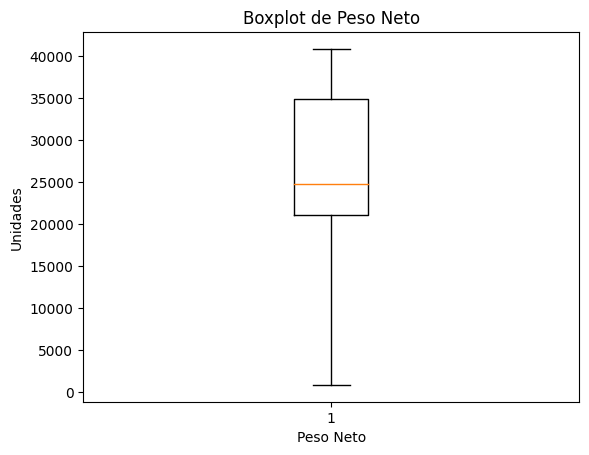

In [45]:
# Calcular la media y la desviación estándar
mean = np.mean(df_clean['PESO_NETO'])
std_dev = np.std(df_clean['PESO_NETO'])

# Definir un umbral para identificar outliers
threshold = 3

# Identificar los valores outliers
outliers = []
for value in df_clean['PESO_NETO']:
    z_score = (value - mean) / (std_dev)
    if np.abs(z_score) > threshold:
        outliers.append(value)

# Imprimir los valores outliers
print("Valores outliers encontrados:", outliers)
# Crear el gráfico de boxplot
plt.boxplot(df_clean['PESO_NETO'])
plt.title('Boxplot de Peso Neto')
plt.xlabel('Peso Neto')
plt.ylabel('Unidades')
plt.scatter(x=[1]*len(outliers), y=outliers, c='red', marker='o')
plt.show()

Valores outliers encontrados: [24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5]


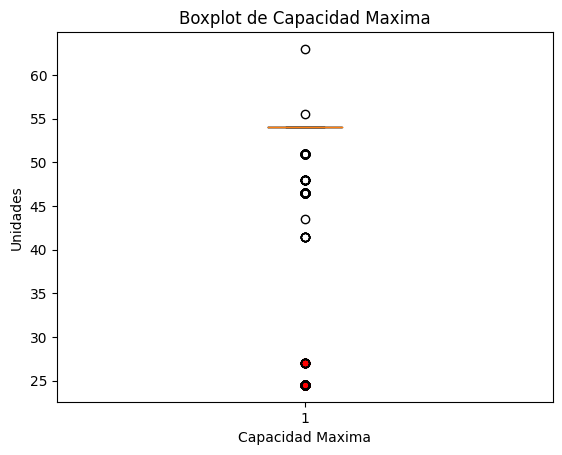

In [46]:
# Calcular la media y la desviación estándar
mean = np.mean(df_clean['CAP_MAXIMA'])
std_dev = np.std(df_clean['CAP_MAXIMA'])

# Definir un umbral para identificar outliers
threshold = 3

# Identificar los valores outliers
outliers = []
for value in df_clean['CAP_MAXIMA']:
    z_score = (value - mean) / (std_dev)
    if np.abs(z_score) > threshold:
        outliers.append(value)

# Imprimir los valores outliers
print("Valores outliers encontrados:", outliers)
# Crear el gráfico de boxplot
plt.boxplot(df_clean['CAP_MAXIMA'])
plt.title('Boxplot de Capacidad Maxima')
plt.xlabel('Capacidad Maxima')
plt.ylabel('Unidades')
plt.scatter(x=[1]*len(outliers), y=outliers, c='red', marker='o')
plt.show()

# Cálculo de estadísticas variables cualitativas y cuantitativas

In [47]:
print("\nCAP_MAXIMA:")
print("Media:",df['CAP_MAXIMA'].mean())
print("Mediana:",df['CAP_MAXIMA'].median())
print("Máximo:",df['CAP_MAXIMA'].max())
print("Mínimo:",df['CAP_MAXIMA'].min())
print("Varianza:",df['CAP_MAXIMA'].var())
print("Desviación Estándar:",df['CAP_MAXIMA'].std())
print("Moda:",df['CAP_MAXIMA'].mode())


CAP_MAXIMA:
Media: 53.244563711911354
Mediana: 54.0
Máximo: 63.0
Mínimo: 24.5
Varianza: 14.792719250043978
Desviación Estándar: 3.846130425511332
Moda: 0    54.0
Name: CAP_MAXIMA, dtype: float64


In [48]:
print("\nPESO_NETO:")
print("Media:",df['PESO_NETO'].mean())
print("Mediana:",df['PESO_NETO'].median())
print("Máximo:",df['PESO_NETO'].max())
print("Mínimo:",df['PESO_NETO'].min())
print("Varianza:",df['PESO_NETO'].var())
print("Desviación Estándar:",df['PESO_NETO'].std())
print("Moda:",df['PESO_NETO'].mode())


PESO_NETO:
Media: 27319.924515235456
Mediana: 28840.0
Máximo: 41200
Mínimo: 0
Varianza: 91847479.07872579
Desviación Estándar: 9583.709046017924
Moda: 0    0
Name: PESO_NETO, dtype: int64


In [49]:
print("CANT_PROGRAMADA:")
print("Media:",df['CANT_PROGRAMADA'].mean())
print("Mediana:",df['CANT_PROGRAMADA'].median())
print("Máximo:",df['CANT_PROGRAMADA'].max())
print("Mínimo:",df['CANT_PROGRAMADA'].min())
print("Varianza:",df['CANT_PROGRAMADA'].var())
print("Desviación Estándar:",df['CANT_PROGRAMADA'].std())
print("Moda:",df['CANT_PROGRAMADA'].mode())

CANT_PROGRAMADA:
Media: 28.70895768698061
Mediana: 29.7635
Máximo: 41.446
Mínimo: 0.818
Varianza: 60.49343800284969
Desviación Estándar: 7.77775276046042
Moda: 0    25.929
Name: CANT_PROGRAMADA, dtype: float64


In [50]:
print('La moda de "TIPO_FORMA" es:', df['TIPO_FORMA'].mode()[0])
print('La moda de "PLANTAORIGEN" es:', df['PLANTAORIGEN'].mode()[0])
print('La moda de "FECHAVIAJE" es:', df['FECHAVIAJE'].mode()[0])
print('La moda de "C_CLIENTE" es:', df['C_CLIENTE'].mode()[0])
print('La moda de "ESTADO" es:', df['ESTADO'].mode()[0])
print('La moda de "D_EMPRESA_TRANSPORTISTA" es:', df['D_EMPRESA_TRANSPORTISTA'].mode()[0])
print('La moda de "C_ID_CONDUCTOR" es:', df['C_ID_CONDUCTOR'].mode()[0])
print('La moda de "TIPO_SERVICIO" es:', df['TIPO_SERVICIO'].mode()[0])
print('La moda de "TIPOCAMION" es:', df['TIPOCAMION'].mode()[0])
print('La moda de "TIPO_PRODUCTO" es:', df['TIPO_PRODUCTO'].mode()[0])
print('La moda de "TIPO_ASIGNACION" es:', df['TIPO_ASIGNACION'].mode()[0])
print('La moda de "C_PLANTA" es:', df['C_PLANTA'].mode()[0])
print('La moda de "TIPO_PERMISO" es:', df['TIPO_PERMISO'].mode()[0])
print('La moda de "ZONA_DESTINO" es:', df['ZONA_DESTINO'].mode()[0])
print('La moda de "CUIDAD" es:', df['CIUDAD'].mode()[0])

La moda de "TIPO_FORMA" es: PLANOS
La moda de "PLANTAORIGEN" es: Guerrero
La moda de "FECHAVIAJE" es: 13/10/2022 23:59:00
La moda de "C_CLIENTE" es: H000269647
La moda de "ESTADO" es: NUEVO LEON
La moda de "D_EMPRESA_TRANSPORTISTA" es: TRANPORTE68
La moda de "C_ID_CONDUCTOR" es: 92866
La moda de "TIPO_SERVICIO" es: LO
La moda de "TIPOCAMION" es: Plataforma 3 ejes Neumatica
La moda de "TIPO_PRODUCTO" es: ROLLO
La moda de "TIPO_ASIGNACION" es: MANUAL
La moda de "C_PLANTA" es: GUE
La moda de "TIPO_PERMISO" es: Traslado Externo
La moda de "ZONA_DESTINO" es: 0
La moda de "CUIDAD" es: APODACA


# Gráficas para probar dependencia de variables

<Axes: title={'center': 'Planta de origen'}, ylabel='PLANTAORIGEN'>

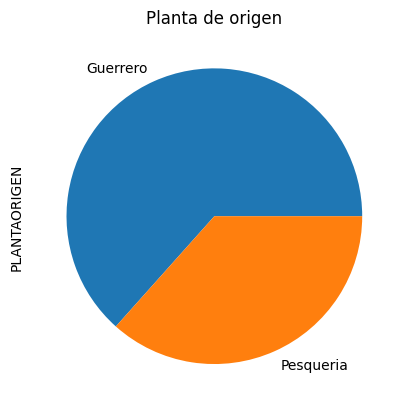

In [51]:
planta_origen =df.PLANTAORIGEN.value_counts().plot(kind="pie") 
planta_origen.set_title('Planta de origen')
planta_origen

<Axes: title={'center': 'Tipo de servicio'}>

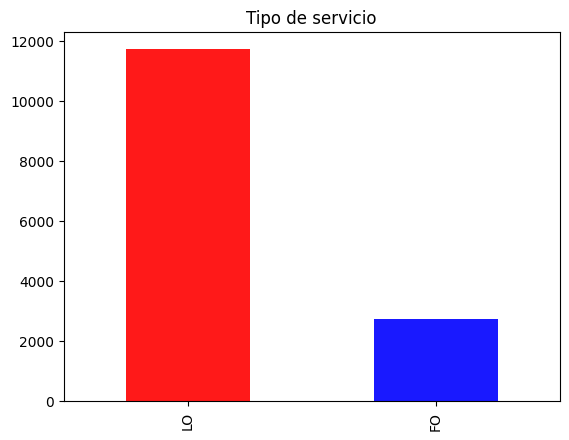

In [52]:
planta_origen = df.TIPO_SERVICIO.value_counts().plot(kind="bar",color=['red', 'blue'],alpha=0.9) 
planta_origen.set_title('Tipo de servicio')
planta_origen

<Axes: title={'center': 'Tipo de producto'}>

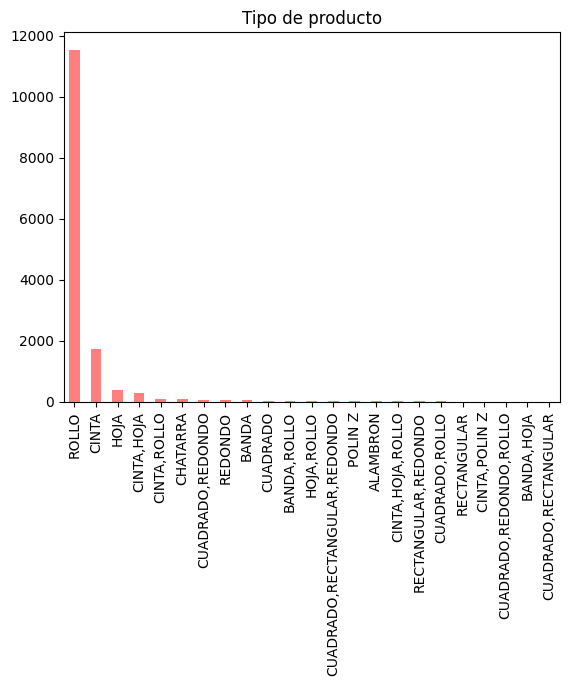

In [53]:
planta_origen = df.TIPO_PRODUCTO.value_counts().plot(kind="bar",color="red",alpha=0.5) 
planta_origen.set_title('Tipo de producto')
planta_origen

<Axes: title={'center': 'Tipo de forma'}>

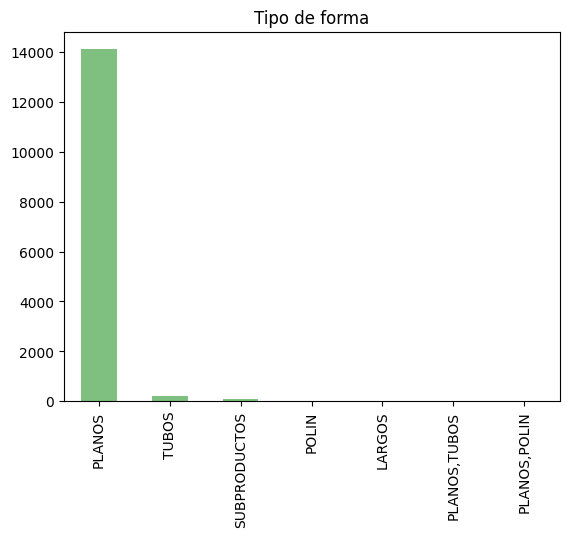

In [54]:
planta_origen = df.TIPO_FORMA.value_counts().plot(kind="bar",color="green",alpha=0.5) 
planta_origen.set_title('Tipo de forma')
planta_origen

<Axes: title={'center': 'Tipo de asignación'}, ylabel='TIPO_ASIGNACION'>

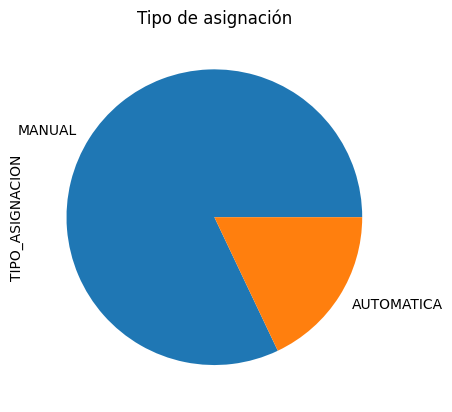

In [55]:
planta_origen = df.TIPO_ASIGNACION.value_counts().plot(kind="pie") 
planta_origen.set_title('Tipo de asignación')
planta_origen

<Axes: title={'center': 'Tipo de permiso'}>

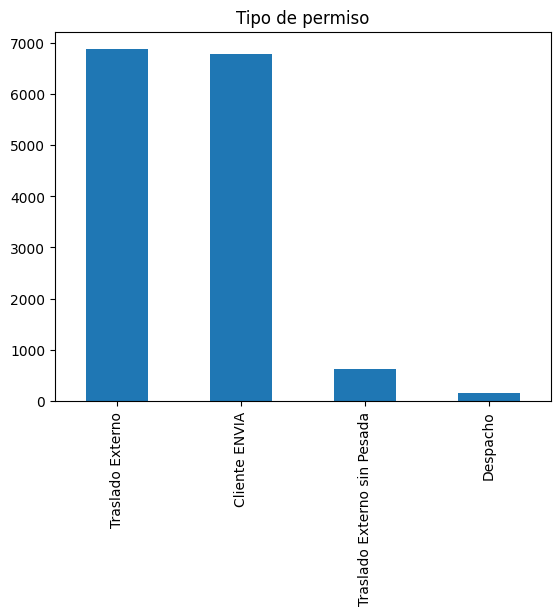

In [56]:
planta_origen = df.TIPO_PERMISO.value_counts().plot(kind="bar") 
planta_origen.set_title('Tipo de permiso')
planta_origen

In [57]:
df_destino=df.drop(df[df['ZONA_DESTINO'] == "0"].index) #Eliminando los 0

<Axes: title={'center': 'Zona de destino'}>

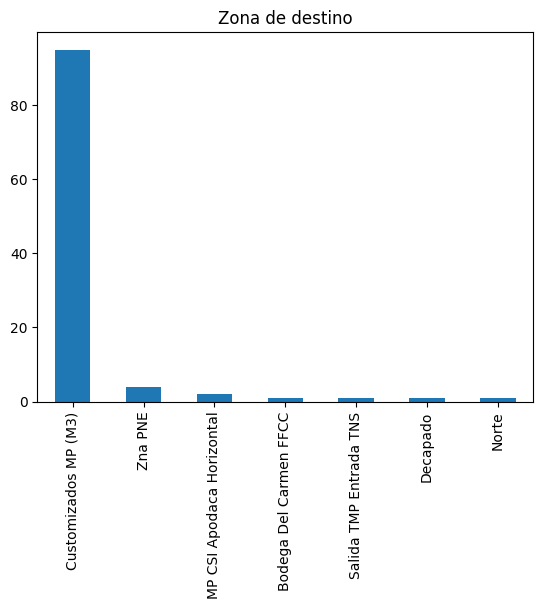

In [58]:
planta_origen = df_destino.ZONA_DESTINO.value_counts().plot(kind="bar") 
planta_origen.set_title('Zona de destino')
planta_origen

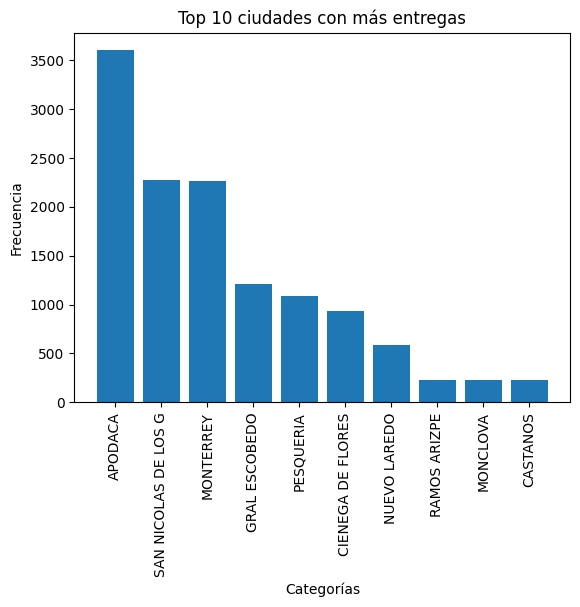

In [59]:
counts = df['CIUDAD'].value_counts()
counts = df['CIUDAD'].value_counts()
plt.bar(counts.index[:10], counts.values[:10])
plt.title('Top 10 ciudades con más entregas')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

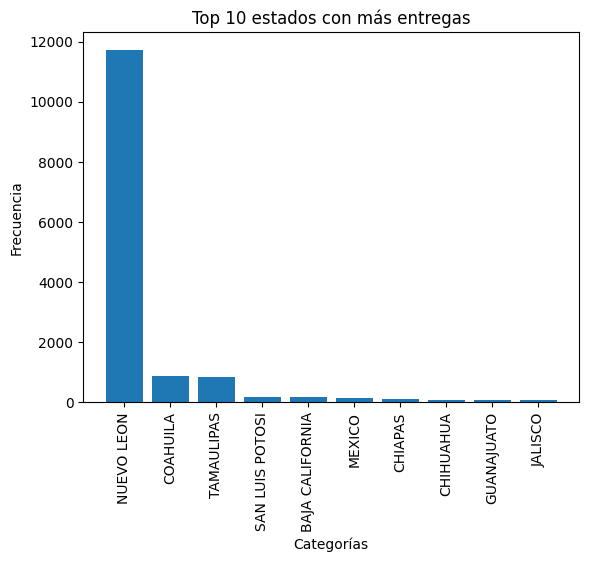

In [60]:
counts = df['ESTADO'].value_counts()
plt.bar(counts.index[:10], counts.values[:10])
plt.title('Top 10 estados con más entregas')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

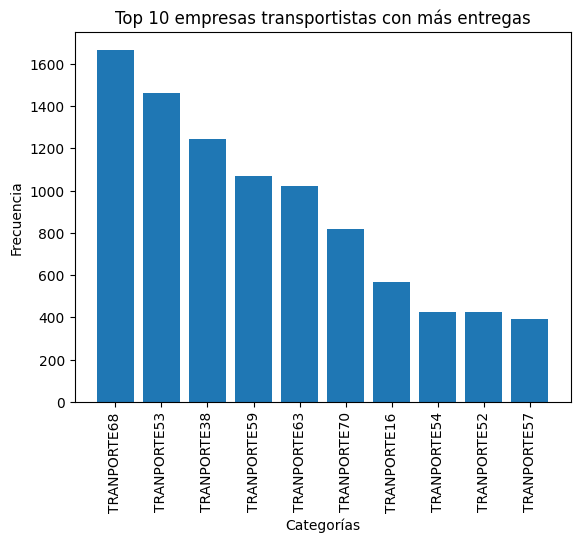

In [61]:
counts = df['D_EMPRESA_TRANSPORTISTA'].value_counts()
plt.bar(counts.index[:10], counts.values[:10])
plt.title('Top 10 empresas transportistas con más entregas')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [62]:
df_num= df.drop(['C_ID_VIAJE','ID_ESTADO','C_ID_CONDUCTOR'], axis=1)

df_num.corr(method='pearson')

<ipython-input-62-76d53264c5bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_num.corr(method='pearson')


,CANT_PROGRAMADA,PESO_NETO,CAP_MAXIMA
CANT_PROGRAMADA,1.000000,0.716711,0.338885
PESO_NETO,0.716711,1.000000,0.246934
CAP_MAXIMA,0.338885,0.246934,1.000000


<ipython-input-63-0e9ccc8040c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_num.corr().round(2)


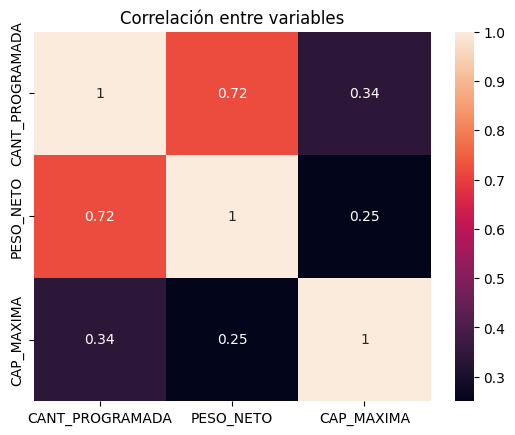

In [63]:
correlation_matrix = df_num.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlación entre variables');

In [64]:
#Tabla de distribución de frecuencias en variables categóricas
columnas_interes = ['TIPO_FORMA', 'PLANTAORIGEN', 'C_CLIENTE', 'ESTADO', 'D_EMPRESA_TRANSPORTISTA', 'C_ID_CONDUCTOR', 'TIPO_SERVICIO', 'TIPOCAMION', 'TIPO_PRODUCTO', 'TIPO_ASIGNACION', 'C_PLANTA', 'TIPO_PERMISO', 'ZONA_DESTINO', 'CIUDAD']
tablas_frecuencias = []

for columna in columnas_interes:
    tabla_frecuencia = df[columna].value_counts().reset_index()
    tabla_frecuencia.columns = ['Valor', f'Frecuencia_{columna}']
    tablas_frecuencias.append(tabla_frecuencia)

tablas_frecuencias

[          Valor  Frecuencia_TIPO_FORMA
 0        PLANOS                  14114
 1         TUBOS                    200
 2  SUBPRODUCTOS                     92
 3         POLIN                     13
 4        LARGOS                     10
 5  PLANOS,TUBOS                      8
 6  PLANOS,POLIN                      3,
        Valor  Frecuencia_PLANTAORIGEN
 0   Guerrero                     9154
 1  Pesqueria                     5286,
           Valor  Frecuencia_C_CLIENTE
 0    H000269647                   783
 1    H000126500                   596
 2    H010005034                   582
 3    H000122204                   459
 4    H000041807                   421
 ..          ...                   ...
 227  N000191639                     1
 228  N000001967                     1
 229  N000000687                     1
 230  N000003863                     1
 231  H000148817                     1
 
 [232 rows x 2 columns],
                Valor  Frecuencia_ESTADO
 0         NUEVO LEON    

In [65]:
#Medidas de posición no-central para variables cuantitativas: Cuartiles

# Lista de columnas para los cuartiles
columnas_interes_1 = ['CANT_PROGRAMADA', 'PESO_NETO', 'CAP_MAXIMA']

# Calcular los cuartiles solo para las columnas de interés
cuartiles = df[columnas_interes_1].quantile([0.25, 0.5, 0.75])

# Obtener los valores de los cuartiles
cuartil_25 = cuartiles.loc[0.25]
cuartil_50 = cuartiles.loc[0.5]
cuartil_75 = cuartiles.loc[0.75]

# Imprimir los valores de los cuartiles
print("Cuartil 25:")
print(cuartil_25)
print("\nCuartil 50 (Mediana):")
print(cuartil_50)
print("\nCuartil 75:")
print(cuartil_75)

Cuartil 25:
CANT_PROGRAMADA       21.7395
PESO_NETO          21407.5000
CAP_MAXIMA            54.0000
Name: 0.25, dtype: float64

Cuartil 50 (Mediana):
CANT_PROGRAMADA       29.7635
PESO_NETO          28840.0000
CAP_MAXIMA            54.0000
Name: 0.5, dtype: float64

Cuartil 75:
CANT_PROGRAMADA       35.66075
PESO_NETO          35210.00000
CAP_MAXIMA            54.00000
Name: 0.75, dtype: float64


In [66]:
#Medidas de posición no-central para variables cuantitativas: Valores atípicos

# Calcular la media y desviación estándar de las columnas de interés
media = df[columnas_interes_1].mean()
desviacion_estandar = df[columnas_interes_1].std()

# Calcular los valores Z para cada valor en las columnas de interés
valores_z = (df[columnas_interes_1] - media) / desviacion_estandar

# Definir umbral para identificar valores atípicos (por ejemplo, Z > 3 o Z < -3)
umbral = 3

# Identificar valores atípicos basados en los valores Z
valores_atipicos = df[valores_z.abs() > umbral][columnas_interes_1]
valores_atipicos = valores_atipicos.dropna()

# Imprimir los valores atípicos
print(valores_atipicos)

Empty DataFrame
Columns: [CANT_PROGRAMADA, PESO_NETO, CAP_MAXIMA]
Index: []


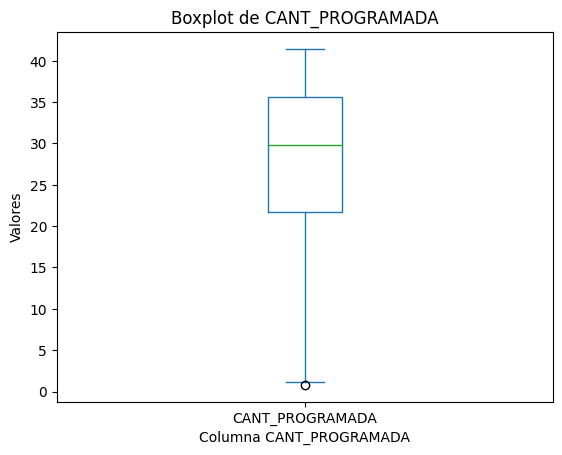

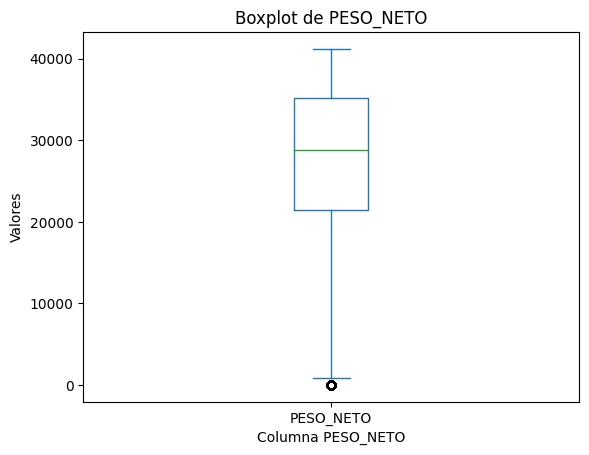

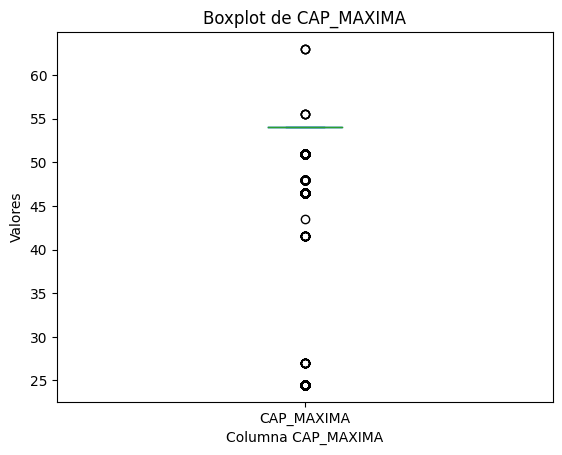

In [67]:
#Medidas de posición no-central para variables cuantitativas: Boxplots

# Crear los boxplots
for col in columnas_interes_1:
    plt.figure()
    df[col].plot(kind='box')
    plt.xlabel('Columna {}'.format(col))
    plt.ylabel('Valores')
    plt.title('Boxplot de {}'.format(col))

plt.show()

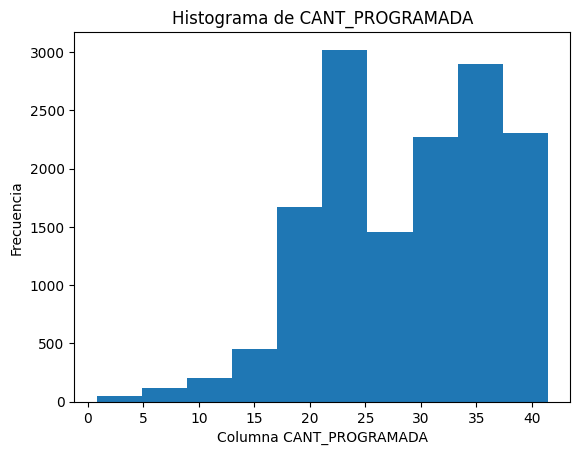

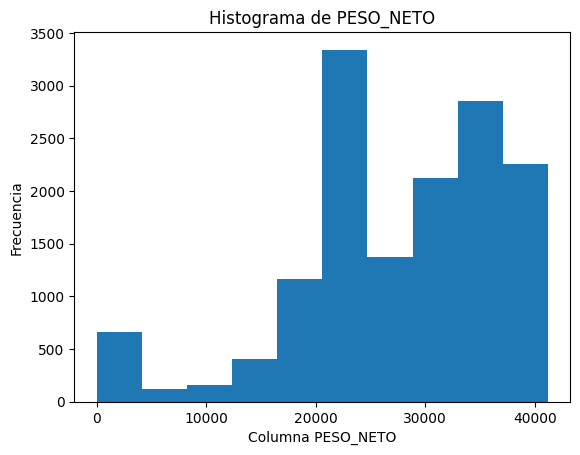

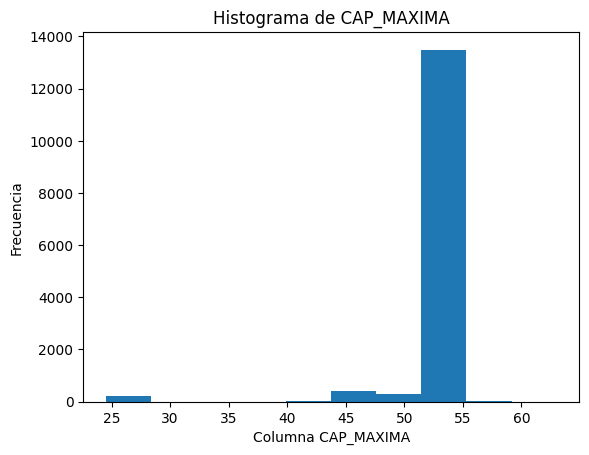

In [68]:
#Análisis de distribución de datos (Histogramas), Identificar si tiene forma simétrica o asimétrica (variables cuantitativas)

#Crear histogramas separados para cada columna de valores cuantitativos
for col in columnas_interes_1:
    plt.figure()
    df[col].plot(kind='hist', bins=10)
    plt.xlabel('Columna {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.title('Histograma de {}'.format(col))

plt.show()

In [69]:
# Obtener los 10 valores más comunes en la columna "D_EMPRESA_TRANSPORTISTA"
top_3 = df['D_EMPRESA_TRANSPORTISTA'].value_counts().nlargest(4).index.tolist()

# Seleccionar las filas del DataFrame que contienen los valores más comunes
df_top3 = df[df['D_EMPRESA_TRANSPORTISTA'].isin(top_3)]

df_top3

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
5,Pesqueria,01/10/2022 01:42:42,46252415,01/10/2022 17:44:00,N000100266,CLIENTE190,2,BAJA CALIFORNIA,TRANPORTE53,43791,...,09/30/2022 23:16:25,10/01/2022 01:42:42,MANUAL,PSQ,Pesqueria,Cliente ENVIA,36980,54.0,0,MEXICALI
8,Pesqueria,01/10/2022 01:47:33,46247529,30/09/2022 13:11:00,H000122205,CLIENTE95,19,NUEVO LEON,TRANPORTE68,106592,...,10/01/2022 01:27:50,10/01/2022 01:47:33,AUTOMATICA,PSQ,Pesqueria,Cliente ENVIA,39050,54.0,0,APODACA
9,Pesqueria,01/10/2022 01:28:20,46252420,01/10/2022 17:44:00,H000269818,CLIENTE232,2,BAJA CALIFORNIA,TRANPORTE53,110161,...,09/30/2022 22:42:16,10/01/2022 01:28:19,MANUAL,PSQ,Pesqueria,Cliente ENVIA,35070,54.0,0,MEXICALI
17,Pesqueria,01/10/2022 00:01:49,46251419,30/09/2022 16:57:00,H000756702,CLIENTE6,19,NUEVO LEON,TRANPORTE59,109540,...,09/30/2022 23:46:08,10/01/2022 00:01:49,NaN,PSQ,Pesqueria,Cliente ENVIA,22940,54.0,0,GRAL ESCOBEDO
21,Pesqueria,01/10/2022 02:18:00,46251518,30/09/2022 23:59:00,N000100834,CLIENTE236,19,NUEVO LEON,TRANPORTE53,99575,...,10/01/2022 01:57:02,10/01/2022 02:18:00,NaN,PSQ,Pesqueria,Cliente ENVIA,27040,54.0,0,PESQUERIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9028,Guerrero,11/12/2022 08:27:07,47152009,07-11-2022 22:24:00,NaN,CLIENTE224,19,NUEVO LEON,TRANPORTE68,109736,...,12-11-2022 08:19:53,12-11-2022 08:27:07,MANUAL,GUE,Guerrero,Traslado Externo,21540,54.0,0,SAN NICOLAS DE LOS G
9029,Guerrero,11/12/2022 22:16:01,47249070,12-11-2022 15:24:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE68,109736,...,12-11-2022 21:42:31,12-11-2022 22:16:01,NaN,GUE,Guerrero,Traslado Externo,37920,54.0,0,MONTERREY
9030,Guerrero,11/18/2022 21:46:42,47372259,18-11-2022 23:59:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE68,109736,...,18-11-2022 20:40:31,18-11-2022 21:46:42,NaN,GUE,Guerrero,Traslado Externo,38850,54.0,0,MONTERREY
9031,Guerrero,11/27/2022 01:45:03,47539248,26-11-2022 00:23:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE68,109736,...,27-11-2022 01:04:07,27-11-2022 01:45:03,NaN,GUE,Guerrero,Traslado Externo,39850,54.0,Customizados MP (M3),MONTERREY


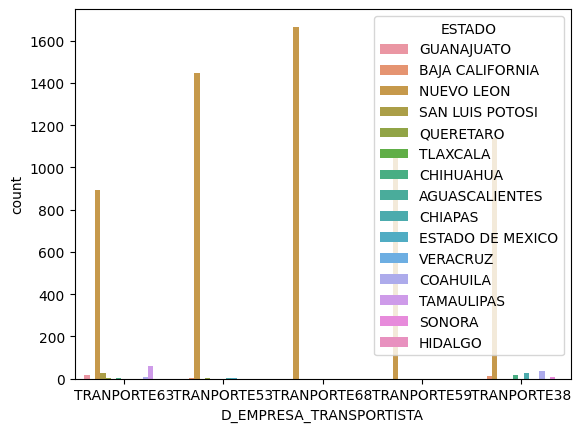

In [70]:
top_5 = df['D_EMPRESA_TRANSPORTISTA'].value_counts().nlargest(5).index.tolist()

# Seleccionar las filas del DataFrame que contienen los valores más comunes
df_top5 = df[df['D_EMPRESA_TRANSPORTISTA'].isin(top_5)]



filas_a_eliminar = df_top5[df_top5['ESTADO'] =="Nuevo Leon"].index

# eliminar las filas seleccionadas del DataFrame
df_NL = df_top5.drop(filas_a_eliminar)

CrosstabResult=pd.crosstab(df_NL['D_EMPRESA_TRANSPORTISTA'],df_NL['ESTADO'])
sns.countplot(x="D_EMPRESA_TRANSPORTISTA", hue="ESTADO", data=df_NL);

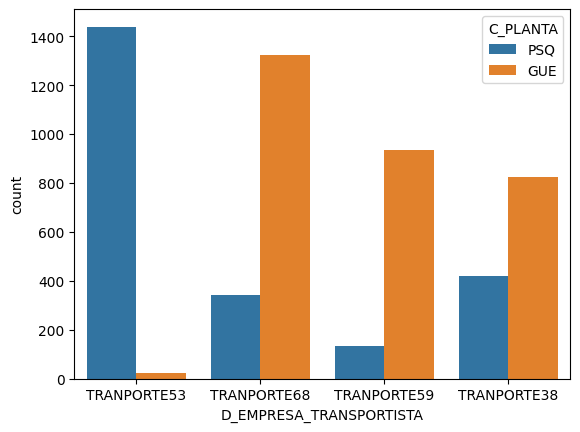

In [71]:
CrosstabResult=pd.crosstab(df_top3['D_EMPRESA_TRANSPORTISTA'],df_top3['C_PLANTA'])
sns.countplot(x="D_EMPRESA_TRANSPORTISTA", hue="C_PLANTA", data=df_top3);

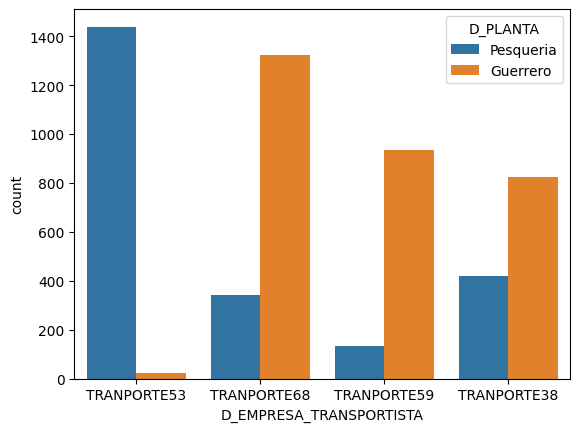

In [72]:
CrosstabResult=pd.crosstab(df_top3['D_EMPRESA_TRANSPORTISTA'],df_top3['D_PLANTA'])
sns.countplot(x="D_EMPRESA_TRANSPORTISTA", hue="D_PLANTA", data=df_top3);

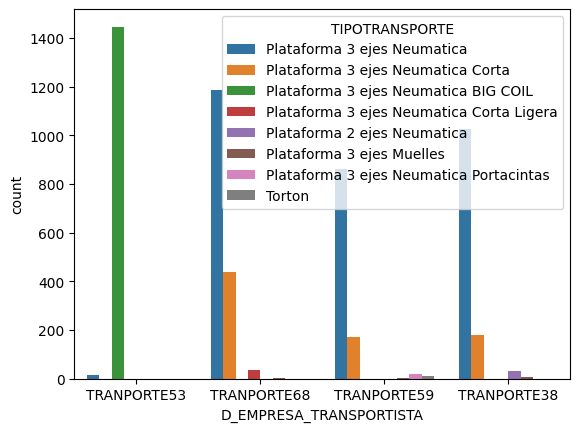

In [73]:
CrosstabResult=pd.crosstab(df_top3['D_EMPRESA_TRANSPORTISTA'],df_top3['TIPOTRANSPORTE'])
sns.countplot(x="D_EMPRESA_TRANSPORTISTA", hue="TIPOTRANSPORTE", data=df_top3);

In [74]:
df_top3['ZONA_DESTINO'] = df_top3['ZONA_DESTINO'].replace("0", pd.np.nan)

# Eliminar las filas que contienen valores nulos solo en la columna 'ZONA_DESTINO'
df_top3 = df_top3.dropna(subset=['ZONA_DESTINO'])

df_top3

<ipython-input-74-7cc77455d3a0>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_top3['ZONA_DESTINO'] = df_top3['ZONA_DESTINO'].replace("0", pd.np.nan)
<ipython-input-74-7cc77455d3a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['ZONA_DESTINO'] = df_top3['ZONA_DESTINO'].replace("0", pd.np.nan)


,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
26,Pesqueria,01/10/2022 05:12:41,46257534,03/10/2022 23:14:00,NaN,CLIENTE125,19,NUEVO LEON,TRANPORTE38,38395,...,10/01/2022 04:52:27,10/01/2022 05:12:41,NaN,PSQ,Pesqueria,Traslado Externo,35550,54.0,Nave 5 Ojo Horizontal,SAN NICOLAS DE LOS G
27,Pesqueria,01/10/2022 05:13:59,46256288,02/10/2022 22:10:00,NaN,CLIENTE237,19,NUEVO LEON,TRANPORTE38,95846,...,10/01/2022 04:02:30,10/01/2022 05:13:59,NaN,PSQ,Pesqueria,Traslado Externo,38970,54.0,MP CSI Apodaca Horizontal,APODACA
72,Pesqueria,01/10/2022 06:25:41,46264732,01/10/2022 23:59:00,NaN,CLIENTE237,19,NUEVO LEON,TRANPORTE38,106776,...,10/01/2022 05:45:58,10/01/2022 06:25:41,NaN,PSQ,Pesqueria,Traslado Externo,26080,54.0,MP CSI Apodaca Horizontal,APODACA
84,Pesqueria,01/10/2022 09:05:49,46265791,01/10/2022 23:59:00,NaN,CLIENTE237,19,NUEVO LEON,TRANPORTE38,60315,...,10/01/2022 08:31:07,10/01/2022 09:05:48,NaN,PSQ,Pesqueria,Traslado Externo,30440,54.0,MP CSI Apodaca Horizontal,APODACA
121,Pesqueria,01/10/2022 12:42:06,46258950,01/10/2022 00:21:00,NaN,CLIENTE241,19,NUEVO LEON,TRANPORTE38,105386,...,10/01/2022 12:24:24,10/01/2022 12:42:05,MANUAL,PSQ,Pesqueria,Traslado Externo,19590,54.0,Pegi TPG Primera,SAN NICOLAS DE LOS G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8838,Guerrero,11/19/2022 18:32:27,47390668,19-11-2022 10:32:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE38,83030,...,19-11-2022 18:19:10,19-11-2022 18:32:27,NaN,GUE,Guerrero,Traslado Externo,37910,54.0,Customizados MP (M3),MONTERREY
8849,Guerrero,11/03/2022 17:12:43,47028063,03-11-2022 13:27:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE59,104332,...,03-11-2022 17:04:02,03-11-2022 17:12:43,NaN,GUE,Guerrero,Traslado Externo,21470,54.0,Customizados MP (M3),MONTERREY
8857,Guerrero,11/12/2022 14:14:15,47231669,11-11-2022 17:21:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE59,104332,...,12-11-2022 13:48:14,12-11-2022 14:14:15,NaN,GUE,Guerrero,Traslado Externo,39080,54.0,Customizados MP (M3),MONTERREY
8889,Guerrero,11/06/2022 05:56:43,47111795,06-11-2022 00:17:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE68,95663,...,06-11-2022 05:23:02,06-11-2022 05:56:43,NaN,GUE,Guerrero,Traslado Externo,39780,54.0,Customizados MP (M3),MONTERREY


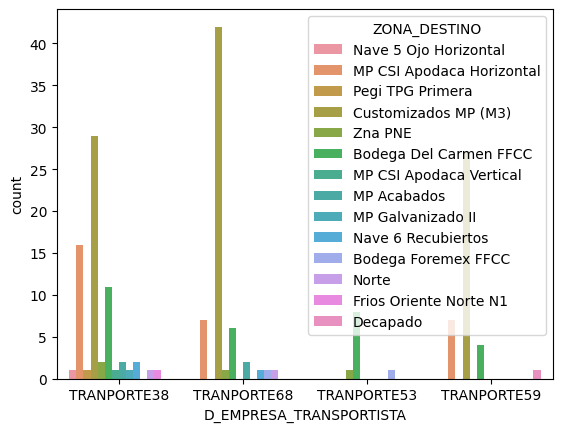

In [75]:
CrosstabResult=pd.crosstab(df_top3['D_EMPRESA_TRANSPORTISTA'],df_top3['ZONA_DESTINO'])
sns.countplot(x="D_EMPRESA_TRANSPORTISTA", hue="ZONA_DESTINO", data=df_top3);

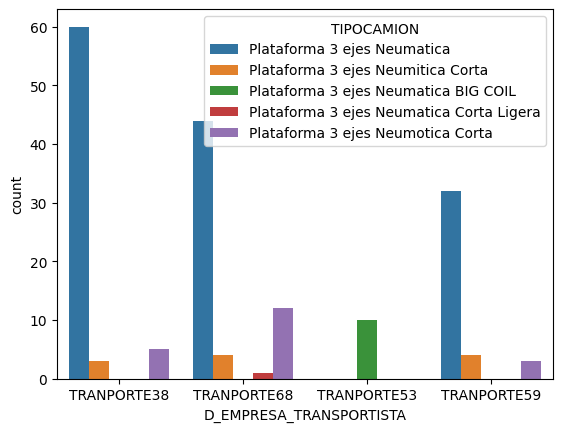

In [76]:
CrosstabResult=pd.crosstab(df_top3['D_EMPRESA_TRANSPORTISTA'],df_top3['TIPOCAMION'])
sns.countplot(x="D_EMPRESA_TRANSPORTISTA", hue="TIPOCAMION", data=df_top3);

In [77]:
frecuencia = df['PESO_NETO'].value_counts()
frecuencia = frecuencia.sort_values(ascending=False)
top10 = frecuencia[:10]
df_peso_top10 = df[df['PESO_NETO'].isin(top10.index)]

df_peso_top10 = df_peso_top10.drop(df_peso_top10[df_peso_top10['PESO_NETO'] == 0].index)

df_peso_top10

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
320,Pesqueria,02/10/2022 10:09:18,46272867,15/10/2022 23:59:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE63,103689,...,10/02/2022 09:58:20,10/02/2022 10:09:18,NaN,PSQ,Pesqueria,Traslado Externo,32180,54.0,0,MONTERREY
1032,Pesqueria,05/10/2022 02:27:40,46366486,05/10/2022 23:59:00,N000100732,CLIENTE220,5,COAHUILA,TRANPORTE66,101875,...,10/05/2022 02:07:48,10/05/2022 02:27:39,NaN,PSQ,Pesqueria,Cliente ENVIA,32150,54.0,0,CASTANOS
1135,Pesqueria,05/10/2022 11:13:56,46376805,05/10/2022 23:59:00,H000122205,CLIENTE95,19,NUEVO LEON,TRANPORTE70,110000,...,10/05/2022 10:29:13,10/05/2022 11:13:56,MANUAL,PSQ,Pesqueria,Cliente ENVIA,21220,48.0,0,APODACA
1515,Pesqueria,06/10/2022 20:59:19,46408884,06/10/2022 12:09:00,NaN,CLIENTE125,19,NUEVO LEON,TRANPORTE70,110000,...,10/06/2022 20:20:05,10/06/2022 20:59:19,MANUAL,PSQ,Pesqueria,Traslado Externo,21170,48.0,0,SAN NICOLAS DE LOS G
1707,Pesqueria,07/10/2022 09:41:35,46405335,06/10/2022 09:11:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE53,104781,...,10/07/2022 09:04:51,10/07/2022 09:41:35,NaN,PSQ,Pesqueria,Traslado Externo,21170,54.0,0,MONTERREY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Guerrero,11/08/2022 20:40:10,47168516,08-11-2022 17:53:00,H010000377,CLIENTE188,19,NUEVO LEON,TRANPORTE68,63471,...,08-11-2022 20:30:33,08-11-2022 20:40:09,MANUAL,GUE,Guerrero,Cliente ENVIA,21310,54.0,0,APODACA
8758,Guerrero,11/11/2022 09:30:28,47222383,11-11-2022 23:59:00,NaN,CLIENTE224,19,NUEVO LEON,TRANPORTE68,63471,...,11-11-2022 09:15:55,11-11-2022 09:30:28,MANUAL,GUE,Guerrero,Traslado Externo,21170,54.0,0,SAN NICOLAS DE LOS G
8771,Guerrero,11/16/2022 11:01:01,47319811,16-11-2022 23:59:00,H000122204,CLIENTE163,19,NUEVO LEON,TRANPORTE68,90808,...,16-11-2022 10:16:26,16-11-2022 11:01:01,MANUAL,GUE,Guerrero,Cliente ENVIA,21310,54.0,0,APODACA
8948,Guerrero,11/29/2022 22:45:25,47619958,29-11-2022 18:23:00,H009900004,CLIENTE26,19,NUEVO LEON,TRANPORTE22,108289,...,29-11-2022 22:17:16,29-11-2022 22:45:25,MANUAL,GUE,Guerrero,Cliente ENVIA,21510,54.0,0,APODACA


In [78]:
# Obtener la frecuencia de cada string en el dataframe
frecuencia2 = df_peso_top10['TIPOCAMION'].value_counts()

# Seleccionar las 10 strings más comunes
strings_comunes = frecuencia2[:5].index.tolist()

# Filtrar las filas que contienen las strings más comunes
df_camion_top10 = df_peso_top10[df_peso_top10['TIPOCAMION'].isin(strings_comunes)]
df_camion_top10

,PLANTAORIGEN,FECHADESPACHO,C_ID_VIAJE,FECHAVIAJE,C_CLIENTE,D_CLIENTE,ID_ESTADO,ESTADO,D_EMPRESA_TRANSPORTISTA,C_ID_CONDUCTOR,...,F_FINCARGA,F_PESAJESALIDA,TIPO_ASIGNACION,C_PLANTA,D_PLANTA,TIPO_PERMISO,PESO_NETO,CAP_MAXIMA,ZONA_DESTINO,CIUDAD
320,Pesqueria,02/10/2022 10:09:18,46272867,15/10/2022 23:59:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE63,103689,...,10/02/2022 09:58:20,10/02/2022 10:09:18,NaN,PSQ,Pesqueria,Traslado Externo,32180,54.0,0,MONTERREY
1032,Pesqueria,05/10/2022 02:27:40,46366486,05/10/2022 23:59:00,N000100732,CLIENTE220,5,COAHUILA,TRANPORTE66,101875,...,10/05/2022 02:07:48,10/05/2022 02:27:39,NaN,PSQ,Pesqueria,Cliente ENVIA,32150,54.0,0,CASTANOS
1707,Pesqueria,07/10/2022 09:41:35,46405335,06/10/2022 09:11:00,NaN,CLIENTE58,19,NUEVO LEON,TRANPORTE53,104781,...,10/07/2022 09:04:51,10/07/2022 09:41:35,NaN,PSQ,Pesqueria,Traslado Externo,21170,54.0,0,MONTERREY
1747,Pesqueria,07/10/2022 12:14:08,46431092,10/10/2022 07:09:00,NaN,CLIENTE242,19,NUEVO LEON,TRANPORTE63,108374,...,10/07/2022 11:38:10,10/07/2022 12:14:08,NaN,PSQ,Pesqueria,Traslado Externo,33220,54.0,0,PESQUERIA
1862,Pesqueria,07/10/2022 18:07:49,46433017,10/10/2022 09:20:00,NaN,CLIENTE242,19,NUEVO LEON,TRANPORTE52,102408,...,10/07/2022 17:53:39,10/07/2022 18:07:49,NaN,PSQ,Pesqueria,Traslado Externo,21290,54.0,0,PESQUERIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Guerrero,11/08/2022 20:40:10,47168516,08-11-2022 17:53:00,H010000377,CLIENTE188,19,NUEVO LEON,TRANPORTE68,63471,...,08-11-2022 20:30:33,08-11-2022 20:40:09,MANUAL,GUE,Guerrero,Cliente ENVIA,21310,54.0,0,APODACA
8758,Guerrero,11/11/2022 09:30:28,47222383,11-11-2022 23:59:00,NaN,CLIENTE224,19,NUEVO LEON,TRANPORTE68,63471,...,11-11-2022 09:15:55,11-11-2022 09:30:28,MANUAL,GUE,Guerrero,Traslado Externo,21170,54.0,0,SAN NICOLAS DE LOS G
8771,Guerrero,11/16/2022 11:01:01,47319811,16-11-2022 23:59:00,H000122204,CLIENTE163,19,NUEVO LEON,TRANPORTE68,90808,...,16-11-2022 10:16:26,16-11-2022 11:01:01,MANUAL,GUE,Guerrero,Cliente ENVIA,21310,54.0,0,APODACA
8948,Guerrero,11/29/2022 22:45:25,47619958,29-11-2022 18:23:00,H009900004,CLIENTE26,19,NUEVO LEON,TRANPORTE22,108289,...,29-11-2022 22:17:16,29-11-2022 22:45:25,MANUAL,GUE,Guerrero,Cliente ENVIA,21510,54.0,0,APODACA


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Plataforma 3 ejes Neumatica BIG COIL'),
  Text(1, 0, 'Plataforma 3 ejes Neumatica'),
  Text(2, 0, 'Plataforma 3 ejes Neumotica Corta'),
  Text(3, 0, 'Plataforma 2 ejes Neumatica'),
  Text(4, 0, 'Plataforma 3 ejes Neumatica Corta')])

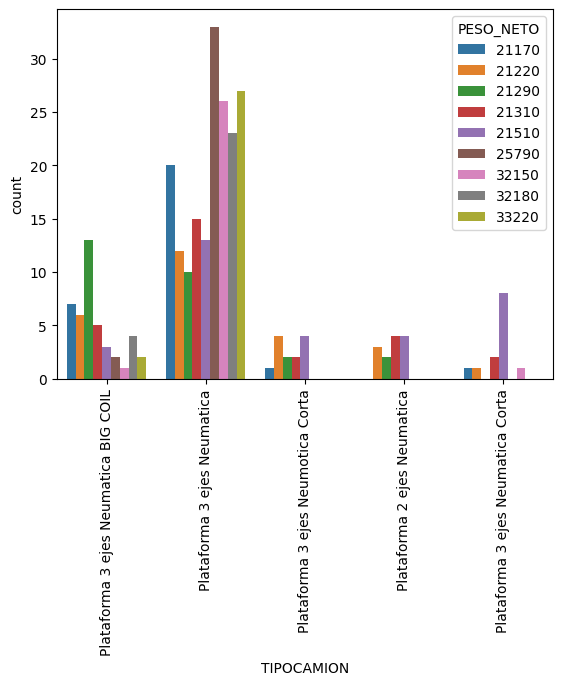

In [79]:
CrosstabResult=pd.crosstab(df_camion_top10['TIPOCAMION'],df_camion_top10['PESO_NETO'])
sns.countplot(x="TIPOCAMION", hue="PESO_NETO", data=df_camion_top10);
plt.xticks(rotation=90)

# Pruebas de dependencia chi-cuadrado

In [80]:
df = df.drop(['C_CLIENTE', 'FECHADESPACHO', 'C_ID_VIAJE', 'FECHAVIAJE', 'ID_ESTADO', 'C_ID_CONDUCTOR', 'NOM_APE_COND', 'TIPOCAMION', 'CAP_MAXIMA', 'CANT_PROGRAMADA', 
             'F_PRESENTACION', 'F_LLEGADANAVE', 'F_EGRESONAVE', 'F_INGRESOPLANTA', 'F_PESAJEENTRADA', 'F_ASIGVIAJE', 'F_INICIOCARGABULTO', 'F_FINCARGA', 
             'F_PESAJESALIDA', 'TIPO_ASIGNACION', 'C_PLANTA', 'D_PLANTA', 'ZONA_DESTINO'], axis=1)

In [81]:
from scipy.stats import chi2_contingency

# Crear una lista con todas las columnas del DataFrame
columnas = df.columns

# Utilizar un bucle for anidado para evaluar todas las combinaciones de columnas
for col1 in columnas:
    for col2 in columnas:
        if col1 != col2:  # Evitar comparar una columna consigo misma
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            print(f'Prueba de chi-cuadrado entre {col1} y {col2}:')
            print(f'Estadístico de prueba: {chi2}')
            print(f'Valor p: {p}')
            print(f'Grados de libertad: {dof}')

Prueba de chi-cuadrado entre PLANTAORIGEN y D_CLIENTE:
Estadístico de prueba: 7981.573673582509
Valor p: 0.0
Grados de libertad: 272
Prueba de chi-cuadrado entre PLANTAORIGEN y ESTADO:
Estadístico de prueba: 935.2092324334516
Valor p: 3.162774466085186e-181
Grados de libertad: 25
Prueba de chi-cuadrado entre PLANTAORIGEN y D_EMPRESA_TRANSPORTISTA:
Estadístico de prueba: 6757.945127367248
Valor p: 0.0
Grados de libertad: 90
Prueba de chi-cuadrado entre PLANTAORIGEN y TIPO_SERVICIO:
Estadístico de prueba: 50.76034846343704
Valor p: 1.0436087182764713e-12
Grados de libertad: 1
Prueba de chi-cuadrado entre PLANTAORIGEN y TIPOTRANSPORTE:
Estadístico de prueba: 3847.7959239961956
Valor p: 0.0
Grados de libertad: 13
Prueba de chi-cuadrado entre PLANTAORIGEN y TIPO_PRODUCTO:
Estadístico de prueba: 2055.954883336751
Valor p: 0.0
Grados de libertad: 22
Prueba de chi-cuadrado entre PLANTAORIGEN y TIPO_FORMA:
Estadístico de prueba: 204.59438178866083
Valor p: 1.9956400294280227e-41
Grados de liber

# Transformación y análisis de datos

In [82]:
cols_to_encode = ['PLANTAORIGEN', 'TIPO_SERVICIO', 'TIPO_PRODUCTO', 'TIPO_FORMA', 'TIPO_PERMISO']

# Aplicar codificación one-hot binaria solo a las columnas seleccionadas
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Mostrar el DataFrame codificado
df_encoded

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPOTRANSPORTE,PESO_NETO,CIUDAD,PLANTAORIGEN_Pesqueria,TIPO_SERVICIO_LO,TIPO_PRODUCTO_BANDA,"TIPO_PRODUCTO_BANDA,HOJA",...,TIPO_PRODUCTO_ROLLO,TIPO_FORMA_PLANOS,"TIPO_FORMA_PLANOS,POLIN","TIPO_FORMA_PLANOS,TUBOS",TIPO_FORMA_POLIN,TIPO_FORMA_SUBPRODUCTOS,TIPO_FORMA_TUBOS,TIPO_PERMISO_Despacho,TIPO_PERMISO_Traslado Externo,TIPO_PERMISO_Traslado Externo sin Pesada
0,CLIENTE27,BAJA CALIFORNIA,TRANPORTE31,Plataforma 3 ejes Neumatica Cortina,30670,MEXICALI,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,CLIENTE198,GUANAJUATO,TRANPORTE63,Plataforma 3 ejes Neumatica,36890,LEON,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,CLIENTE231,NUEVO LEON,TRANPORTE52,Plataforma 3 ejes Neumatica BIG COIL,23300,SAN NICOLAS DE LOS G,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,CLIENTE232,BAJA CALIFORNIA,TRANPORTE72,Plataforma 3 ejes Neumatica,36330,MEXICALI,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,CLIENTE233,TAMAULIPAS,TRANPORTE26,Plataforma 3 ejes Neumatica,20480,ALTAMIRA,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,CLIENTE6,NUEVO LEON,TRANPORTE63,Plataforma 3 ejes Neumatica BIG COIL,34580,GRAL ESCOBEDO,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
9150,CLIENTE219,COAHUILA,TRANPORTE48,Plataforma 3 ejes Neumatica,19090,FRONTERA,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9151,CLIENTE219,COAHUILA,TRANPORTE48,Plataforma 3 ejes Neumatica,19090,FRONTERA,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9152,CLIENTE219,COAHUILA,TRANPORTE48,Plataforma 3 ejes Neumatica,19090,FRONTERA,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [83]:
df_encoded.columns

Index(['D_CLIENTE', 'ESTADO', 'D_EMPRESA_TRANSPORTISTA', 'TIPOTRANSPORTE',
       'PESO_NETO', 'CIUDAD', 'PLANTAORIGEN_Pesqueria', 'TIPO_SERVICIO_LO',
       'TIPO_PRODUCTO_BANDA', 'TIPO_PRODUCTO_BANDA,HOJA',
       'TIPO_PRODUCTO_BANDA,ROLLO', 'TIPO_PRODUCTO_CHATARRA',
       'TIPO_PRODUCTO_CINTA', 'TIPO_PRODUCTO_CINTA,HOJA',
       'TIPO_PRODUCTO_CINTA,HOJA,ROLLO', 'TIPO_PRODUCTO_CINTA,POLIN Z',
       'TIPO_PRODUCTO_CINTA,ROLLO', 'TIPO_PRODUCTO_CUADRADO',
       'TIPO_PRODUCTO_CUADRADO,RECTANGULAR',
       'TIPO_PRODUCTO_CUADRADO,RECTANGULAR,REDONDO',
       'TIPO_PRODUCTO_CUADRADO,REDONDO',
       'TIPO_PRODUCTO_CUADRADO,REDONDO,ROLLO', 'TIPO_PRODUCTO_CUADRADO,ROLLO',
       'TIPO_PRODUCTO_HOJA', 'TIPO_PRODUCTO_HOJA,ROLLO',
       'TIPO_PRODUCTO_POLIN Z', 'TIPO_PRODUCTO_RECTANGULAR',
       'TIPO_PRODUCTO_RECTANGULAR,REDONDO', 'TIPO_PRODUCTO_REDONDO',
       'TIPO_PRODUCTO_ROLLO', 'TIPO_FORMA_PLANOS', 'TIPO_FORMA_PLANOS,POLIN',
       'TIPO_FORMA_PLANOS,TUBOS', 'TIPO_FORMA_POLIN',


In [84]:
df_encoded.loc[(df_encoded['TIPO_FORMA_PLANOS,POLIN'] == 1), 'TIPO_FORMA_PLANOS'] = 1
df_encoded.loc[(df_encoded['TIPO_FORMA_PLANOS,POLIN'] == 1), 'TIPO_FORMA_POLIN'] = 1


df_encoded.loc[(df_encoded['TIPO_FORMA_PLANOS,TUBOS'] == "PLANOS,TUBOS"), 'TIPO_FORMA_PLANOS'] = 1
df_encoded.loc[(df_encoded['TIPO_FORMA_PLANOS,TUBOS'] == "PLANOS,TUBOS"), 'TIPO_FORMA_TUBOS'] = 1

df_encoded = df_encoded.drop(['TIPO_FORMA_PLANOS,POLIN', 'TIPO_FORMA_PLANOS,TUBOS'], axis=1)
df_encoded.columns

Index(['D_CLIENTE', 'ESTADO', 'D_EMPRESA_TRANSPORTISTA', 'TIPOTRANSPORTE',
       'PESO_NETO', 'CIUDAD', 'PLANTAORIGEN_Pesqueria', 'TIPO_SERVICIO_LO',
       'TIPO_PRODUCTO_BANDA', 'TIPO_PRODUCTO_BANDA,HOJA',
       'TIPO_PRODUCTO_BANDA,ROLLO', 'TIPO_PRODUCTO_CHATARRA',
       'TIPO_PRODUCTO_CINTA', 'TIPO_PRODUCTO_CINTA,HOJA',
       'TIPO_PRODUCTO_CINTA,HOJA,ROLLO', 'TIPO_PRODUCTO_CINTA,POLIN Z',
       'TIPO_PRODUCTO_CINTA,ROLLO', 'TIPO_PRODUCTO_CUADRADO',
       'TIPO_PRODUCTO_CUADRADO,RECTANGULAR',
       'TIPO_PRODUCTO_CUADRADO,RECTANGULAR,REDONDO',
       'TIPO_PRODUCTO_CUADRADO,REDONDO',
       'TIPO_PRODUCTO_CUADRADO,REDONDO,ROLLO', 'TIPO_PRODUCTO_CUADRADO,ROLLO',
       'TIPO_PRODUCTO_HOJA', 'TIPO_PRODUCTO_HOJA,ROLLO',
       'TIPO_PRODUCTO_POLIN Z', 'TIPO_PRODUCTO_RECTANGULAR',
       'TIPO_PRODUCTO_RECTANGULAR,REDONDO', 'TIPO_PRODUCTO_REDONDO',
       'TIPO_PRODUCTO_ROLLO', 'TIPO_FORMA_PLANOS', 'TIPO_FORMA_POLIN',
       'TIPO_FORMA_SUBPRODUCTOS', 'TIPO_FORMA_TUBOS', 'TIPO_P

In [85]:
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,HOJA'] == 1), 'TIPO_PRODUCTO_CINTA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,HOJA'] == 1), 'TIPO_PRODUCTO_HOJA'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,ROLLO'] == 1), 'TIPO_PRODUCTO_CINTA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,ROLLO'] == 1), 'TIPO_PRODUCTO_ROLLO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,POLIN Z'] == 1), 'TIPO_PRODUCTO_CINTA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,POLIN Z'] == 1), 'TIPO_PRODUCTO_POLIN Z'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,HOJA,ROLLO'] == 1), 'TIPO_PRODUCTO_CINTA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,HOJA,ROLLO'] == 1), 'TIPO_PRODUCTO_HOJA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CINTA,HOJA,ROLLO'] == 1), 'TIPO_PRODUCTO_ROLLO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_BANDA,HOJA'] == 1), 'TIPO_PRODUCTO_BANDA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_BANDA,HOJA'] == 1), 'TIPO_PRODUCTO_HOJA'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_BANDA,ROLLO'] == 1), 'TIPO_PRODUCTO_BANDA'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_BANDA,ROLLO'] == 1), 'TIPO_PRODUCTO_ROLLO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_HOJA,ROLLO'] == 1), 'TIPO_PRODUCTO_ROLLO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_HOJA,ROLLO'] == 1), 'TIPO_PRODUCTO_HOJA'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,REDONDO'] == 1), 'TIPO_PRODUCTO_CUADRADO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,REDONDO'] == 1), 'TIPO_PRODUCTO_REDONDO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,RECTANGULAR'] == 1), 'TIPO_PRODUCTO_CUADRADO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,RECTANGULAR'] == 1), 'TIPO_PRODUCTO_RECTANGULAR'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,ROLLO'] == 1), 'TIPO_PRODUCTO_CUADRADO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,ROLLO'] == 1), 'TIPO_PRODUCTO_ROLLO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_RECTANGULAR,REDONDO'] == 1), 'TIPO_PRODUCTO_RECTANGULAR'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_RECTANGULAR,REDONDO'] == 1), 'TIPO_PRODUCTO_REDONDO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,RECTANGULAR,REDONDO'] == 1), 'TIPO_PRODUCTO_CUADRADO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,RECTANGULAR,REDONDO'] == 1), 'TIPO_PRODUCTO_RECTANGULAR'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,RECTANGULAR,REDONDO'] == 1), 'TIPO_PRODUCTO_REDONDO'] = 1

df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,REDONDO,ROLLO'] == 1), 'TIPO_PRODUCTO_CUADRADO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,REDONDO,ROLLO'] == 1), 'TIPO_PRODUCTO_ROLLO'] = 1
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_CUADRADO,REDONDO,ROLLO'] == 1), 'TIPO_PRODUCTO_REDONDO'] = 1

df_encoded = df_encoded.drop(['TIPO_PRODUCTO_CINTA,HOJA', 'TIPO_PRODUCTO_CINTA,ROLLO', 'TIPO_PRODUCTO_CINTA,POLIN Z',
                             'TIPO_PRODUCTO_CINTA,HOJA,ROLLO', 'TIPO_PRODUCTO_BANDA,HOJA', 'TIPO_PRODUCTO_BANDA,ROLLO',
                             'TIPO_PRODUCTO_HOJA,ROLLO', 'TIPO_PRODUCTO_CUADRADO,REDONDO', 'TIPO_PRODUCTO_CUADRADO,RECTANGULAR',
                             'TIPO_PRODUCTO_CUADRADO,ROLLO', 'TIPO_PRODUCTO_RECTANGULAR,REDONDO', 'TIPO_PRODUCTO_CUADRADO,RECTANGULAR,REDONDO',
                             'TIPO_PRODUCTO_CUADRADO,REDONDO,ROLLO'], axis=1)
df_encoded.columns

Index(['D_CLIENTE', 'ESTADO', 'D_EMPRESA_TRANSPORTISTA', 'TIPOTRANSPORTE',
       'PESO_NETO', 'CIUDAD', 'PLANTAORIGEN_Pesqueria', 'TIPO_SERVICIO_LO',
       'TIPO_PRODUCTO_BANDA', 'TIPO_PRODUCTO_CHATARRA', 'TIPO_PRODUCTO_CINTA',
       'TIPO_PRODUCTO_CUADRADO', 'TIPO_PRODUCTO_HOJA', 'TIPO_PRODUCTO_POLIN Z',
       'TIPO_PRODUCTO_RECTANGULAR', 'TIPO_PRODUCTO_REDONDO',
       'TIPO_PRODUCTO_ROLLO', 'TIPO_FORMA_PLANOS', 'TIPO_FORMA_POLIN',
       'TIPO_FORMA_SUBPRODUCTOS', 'TIPO_FORMA_TUBOS', 'TIPO_PERMISO_Despacho',
       'TIPO_PERMISO_Traslado Externo',
       'TIPO_PERMISO_Traslado Externo sin Pesada'],
      dtype='object')

In [86]:
df_encoded.insert(loc=df_encoded.columns.get_loc('TIPO_PRODUCTO_ROLLO'), column='TIPO_PRODUCTO_ALAMBRON', value=0)
df_encoded.insert(loc=df_encoded.columns.get_loc('TIPO_FORMA_TUBOS'), column='TIPO_FORMA_LARGOS', value=0)
df_encoded.insert(loc=df_encoded.columns.get_loc('TIPO_PERMISO_Traslado Externo'), column='TIPO_PERMISO_Cliente ENVIA', value=0)
df_encoded.columns

Index(['D_CLIENTE', 'ESTADO', 'D_EMPRESA_TRANSPORTISTA', 'TIPOTRANSPORTE',
       'PESO_NETO', 'CIUDAD', 'PLANTAORIGEN_Pesqueria', 'TIPO_SERVICIO_LO',
       'TIPO_PRODUCTO_BANDA', 'TIPO_PRODUCTO_CHATARRA', 'TIPO_PRODUCTO_CINTA',
       'TIPO_PRODUCTO_CUADRADO', 'TIPO_PRODUCTO_HOJA', 'TIPO_PRODUCTO_POLIN Z',
       'TIPO_PRODUCTO_RECTANGULAR', 'TIPO_PRODUCTO_REDONDO',
       'TIPO_PRODUCTO_ALAMBRON', 'TIPO_PRODUCTO_ROLLO', 'TIPO_FORMA_PLANOS',
       'TIPO_FORMA_POLIN', 'TIPO_FORMA_SUBPRODUCTOS', 'TIPO_FORMA_LARGOS',
       'TIPO_FORMA_TUBOS', 'TIPO_PERMISO_Despacho',
       'TIPO_PERMISO_Cliente ENVIA', 'TIPO_PERMISO_Traslado Externo',
       'TIPO_PERMISO_Traslado Externo sin Pesada'],
      dtype='object')

In [87]:
df_encoded.loc[(df_encoded['TIPO_PRODUCTO_BANDA'] == 0) & (df_encoded['TIPO_PRODUCTO_CHATARRA'] == 0) & (df_encoded['TIPO_PRODUCTO_CHATARRA'] == 0)
       & (df_encoded['TIPO_PRODUCTO_CHATARRA'] == 0) & (df_encoded['TIPO_PRODUCTO_CHATARRA'] == 0) & (df_encoded['TIPO_PRODUCTO_CINTA'] == 0)
       & (df_encoded['TIPO_PRODUCTO_CUADRADO'] == 0) & (df_encoded['TIPO_PRODUCTO_HOJA'] == 0) & (df_encoded['TIPO_PRODUCTO_POLIN Z'] == 0)
       & (df_encoded['TIPO_PRODUCTO_RECTANGULAR'] == 0) & (df_encoded['TIPO_PRODUCTO_REDONDO'] == 0) & (df_encoded['TIPO_PRODUCTO_ROLLO'] == 0)
       , 'TIPO_PRODUCTO_ALAMBRON'] = 1
df_encoded.loc[(df_encoded['TIPO_FORMA_PLANOS'] == 0) & (df_encoded['TIPO_FORMA_POLIN'] == 0) & (df_encoded['TIPO_FORMA_SUBPRODUCTOS'] == 0)
        & (df_encoded['TIPO_FORMA_TUBOS'] == 0), 'TIPO_FORMA_LARGOS'] = 1
df_encoded.loc[(df_encoded['TIPO_PERMISO_Despacho'] == 0) & (df_encoded['TIPO_PERMISO_Traslado Externo'] == 0) & (df_encoded['TIPO_PERMISO_Traslado Externo sin Pesada'] == 0)
        , 'TIPO_PERMISO_Cliente ENVIA'] = 1

df_encoded.head()

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPOTRANSPORTE,PESO_NETO,CIUDAD,PLANTAORIGEN_Pesqueria,TIPO_SERVICIO_LO,TIPO_PRODUCTO_BANDA,TIPO_PRODUCTO_CHATARRA,...,TIPO_PRODUCTO_ROLLO,TIPO_FORMA_PLANOS,TIPO_FORMA_POLIN,TIPO_FORMA_SUBPRODUCTOS,TIPO_FORMA_LARGOS,TIPO_FORMA_TUBOS,TIPO_PERMISO_Despacho,TIPO_PERMISO_Cliente ENVIA,TIPO_PERMISO_Traslado Externo,TIPO_PERMISO_Traslado Externo sin Pesada
0,CLIENTE27,BAJA CALIFORNIA,TRANPORTE31,Plataforma 3 ejes Neumatica Cortina,30670,MEXICALI,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,CLIENTE198,GUANAJUATO,TRANPORTE63,Plataforma 3 ejes Neumatica,36890,LEON,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,CLIENTE231,NUEVO LEON,TRANPORTE52,Plataforma 3 ejes Neumatica BIG COIL,23300,SAN NICOLAS DE LOS G,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,CLIENTE232,BAJA CALIFORNIA,TRANPORTE72,Plataforma 3 ejes Neumatica,36330,MEXICALI,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,CLIENTE233,TAMAULIPAS,TRANPORTE26,Plataforma 3 ejes Neumatica,20480,ALTAMIRA,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [88]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación numérica
df_encoded['D_CLIENTE'] = label_encoder.fit_transform(df_encoded['D_CLIENTE'])

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación numérica
df_encoded['ESTADO'] = label_encoder.fit_transform(df_encoded['ESTADO'])

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación numérica
df_encoded['CIUDAD'] = label_encoder.fit_transform(df_encoded['CIUDAD'])

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación numérica
df_encoded['TIPOTRANSPORTE'] = label_encoder.fit_transform(df_encoded['TIPOTRANSPORTE'])

df_encoded['D_EMPRESA_TRANSPORTISTA'] = df_encoded['D_EMPRESA_TRANSPORTISTA'].str.replace('TRANPORTE', 'TRANSPORTE')

df_encoded.head()

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPOTRANSPORTE,PESO_NETO,CIUDAD,PLANTAORIGEN_Pesqueria,TIPO_SERVICIO_LO,TIPO_PRODUCTO_BANDA,TIPO_PRODUCTO_CHATARRA,...,TIPO_PRODUCTO_ROLLO,TIPO_FORMA_PLANOS,TIPO_FORMA_POLIN,TIPO_FORMA_SUBPRODUCTOS,TIPO_FORMA_LARGOS,TIPO_FORMA_TUBOS,TIPO_PERMISO_Despacho,TIPO_PERMISO_Cliente ENVIA,TIPO_PERMISO_Traslado Externo,TIPO_PERMISO_Traslado Externo sin Pesada
0,187,1,TRANSPORTE31,9,30670,39,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,107,8,TRANSPORTE63,5,36890,35,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,145,14,TRANSPORTE52,6,23300,61,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,146,1,TRANSPORTE72,5,36330,39,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,147,22,TRANSPORTE26,5,20480,1,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0


<ipython-input-89-61a77f26b6b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


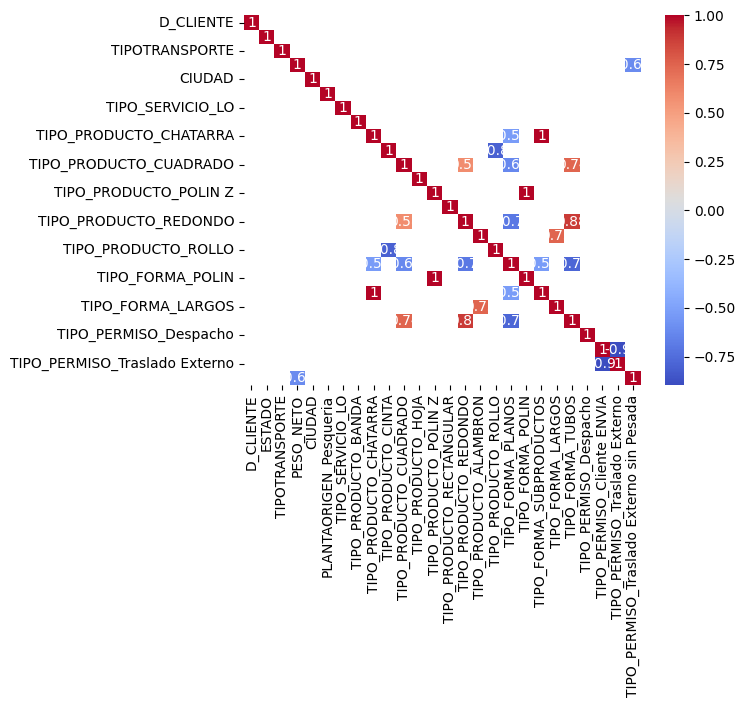

In [89]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Establecer un umbral de correlación
umbral = 0.5

# Filtrar la matriz de correlación
correlation_filtered = correlation_matrix[abs(correlation_matrix) >= umbral]

# Crear el mapa de calor
sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()

In [90]:
df_encoded = df_encoded.drop([
       'TIPO_PRODUCTO_BANDA', 'TIPO_PRODUCTO_CHATARRA', 'TIPO_PRODUCTO_CINTA',
       'TIPO_PRODUCTO_CUADRADO', 'TIPO_PRODUCTO_HOJA', 'TIPO_PRODUCTO_POLIN Z',
       'TIPO_PRODUCTO_RECTANGULAR', 'TIPO_PRODUCTO_REDONDO',
       'TIPO_PRODUCTO_ALAMBRON', 'TIPO_PRODUCTO_ROLLO', 'TIPO_FORMA_PLANOS',
       'TIPO_FORMA_POLIN', 'TIPO_FORMA_SUBPRODUCTOS', 'TIPO_FORMA_LARGOS',
       'TIPO_FORMA_TUBOS'], axis=1)

<ipython-input-91-c82676257c51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  columnas_seleccionadas = df_encoded.corr()


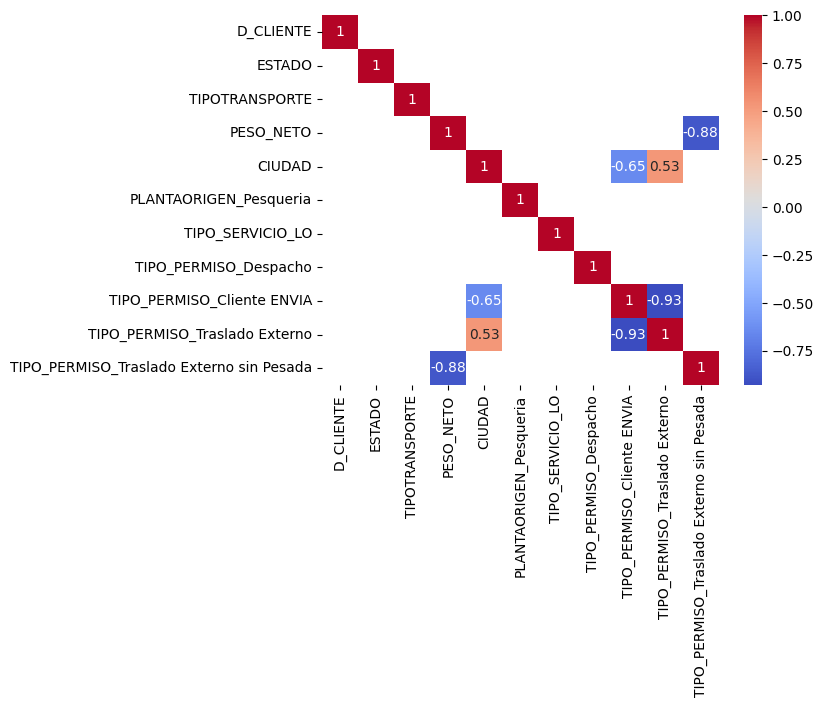

In [91]:
columnas_seleccionadas = df_encoded.corr()

# Calcular la matriz de correlación
matriz_correlacion = columnas_seleccionadas.corr()

# Establecer un umbral de correlación
umbral = 0.5

# Filtrar la matriz de correlación
correlation_filtered = matriz_correlacion[abs(matriz_correlacion) >= umbral]

# Crear el mapa de calor
sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()

In [92]:
df_encoded = df_encoded.drop(['TIPO_PERMISO_Despacho', 'TIPO_PERMISO_Cliente ENVIA',
       'TIPO_PERMISO_Traslado Externo',
       'TIPO_PERMISO_Traslado Externo sin Pesada'], axis=1)

In [93]:
import scipy.stats as stats

# Definir la variable cualitativa y las variables numéricas
variable_cualitativa = "D_EMPRESA_TRANSPORTISTA"
variables_numericas = list(df_encoded.select_dtypes(exclude=['object']).columns)  # Lista de las variables numéricas a evaluar

# Realizar el análisis de varianza (ANOVA) para cada variable numérica
for variable_numerica in variables_numericas:
    anova_result = stats.f_oneway(*(df_encoded[df_encoded[variable_cualitativa] == cat][variable_numerica] for cat in df_encoded[variable_cualitativa].unique()))
    f_statistic = anova_result[0]  # Estadístico F
    p_value = anova_result[1]  # Valor p
    print(f"Variable numérica: {variable_numerica}")
    print("Estadístico F:", f_statistic)
    print("Valor p:", p_value)

Variable numérica: D_CLIENTE
Estadístico F: 20.1554955393527
Valor p: 3.922824732775374e-298
Variable numérica: ESTADO
Estadístico F: 110.05706441919925
Valor p: 0.0
Variable numérica: TIPOTRANSPORTE
Estadístico F: 102.98030148612476
Valor p: 0.0
Variable numérica: PESO_NETO
Estadístico F: 47.86030348734494
Valor p: 0.0
Variable numérica: CIUDAD
Estadístico F: 30.093453339297202
Valor p: 0.0
Variable numérica: PLANTAORIGEN_Pesqueria
Estadístico F: 140.25436370915446
Valor p: 0.0
Variable numérica: TIPO_SERVICIO_LO
Estadístico F: 453.1968709758653
Valor p: 0.0


# Selección de variables de interés y modelos de Aprendizaje

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:
df_encoded.to_csv('encoded.csv')

In [96]:
df_encoded.columns

Index(['D_CLIENTE', 'ESTADO', 'D_EMPRESA_TRANSPORTISTA', 'TIPOTRANSPORTE',
       'PESO_NETO', 'CIUDAD', 'PLANTAORIGEN_Pesqueria', 'TIPO_SERVICIO_LO'],
      dtype='object')

In [97]:
# Separar las variables predictoras y la variable objetivo
X = df_encoded[['D_CLIENTE', 'ESTADO','TIPOTRANSPORTE','PESO_NETO', 'CIUDAD', 'PLANTAORIGEN_Pesqueria']]  # Variables predictoras numéricas
y = df_encoded['D_EMPRESA_TRANSPORTISTA']  # Variable objetivo categórica

In [98]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
# Modelo de Regresión Logística
# Crear y entrenar un modelo de Regresión Logística
modelo = LogisticRegression(max_iter=10000, random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones para las instancias de prueba
y_pred_probs = modelo.predict_proba(X_test)  # Probabilidades de predicción para cada clase
y_pred_classes = modelo.classes_[y_pred_probs.argsort(axis=1)[:, -3:]]  # Obtener las 3 clases con las mayores probabilidades

# Calcular el accuracy global para verificar si alguna de las 3 opciones coincide con la clase real
y_test_array = y_test.values  # Convertir la serie de pandas a un array numpy
aciertos = 0

# Imprimir las 3 mejores opciones de predicción para cada instancia de prueba
for i in range(len(y_pred_classes)):
    print(f'Instancia {i+1}: {y_pred_classes[i]}')

for i in range(len(y_pred_classes)):
    if y_test_array[i] in y_pred_classes[i]:
        aciertos += 1

accuracy = aciertos / len(y_pred_classes)
print(f'Accuracy global: {accuracy:.2f}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Instancia 1: ['TRANSPORTE53' 'TRANSPORTE38' 'TRANSPORTE68']
Instancia 2: ['TRANSPORTE59' 'TRANSPORTE38' 'TRANSPORTE68']
Instancia 3: ['TRANSPORTE63' 'TRANSPORTE68' 'TRANSPORTE53']
Instancia 4: ['TRANSPORTE53' 'TRANSPORTE38' 'TRANSPORTE68']
Instancia 5: ['TRANSPORTE63' 'TRANSPORTE68' 'TRANSPORTE53']
Instancia 6: ['TRANSPORTE59' 'TRANSPORTE38' 'TRANSPORTE68']
Instancia 7: ['TRANSPORTE59' 'TRANSPORTE38' 'TRANSPORTE68']
Instancia 8: ['TRANSPORTE68' 'TRANSPORTE53' 'TRANSPORTE63']
Instancia 9: ['TRANSPORTE38' 'TRANSPORTE16' 'TRANSPORTE68']
Instancia 10: ['TRANSPORTE16' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 11: ['TRANSPORTE63' 'TRANSPORTE68' 'TRANSPORTE53']
Instancia 12: ['TRANSPORTE38' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 13: ['TRANSPORTE63' 'TRANSPORTE57' 'TRANSPORTE53']
Instancia 14: ['TRANSPORTE38' 'TRANSPORTE53' 'TRANSPORTE68']
Instancia 15: ['TRANSPORTE16' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 16: ['TRANSPORTE16' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 17: ['TRANSPORTE38' 'TR

In [100]:
# Modelo de Árbol de Decisión
# Crear y entrenar un modelo de clasificación
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones para las instancias de prueba
y_pred_probs = modelo.predict_proba(X_test)  # Probabilidades de predicción para cada clase
y_pred_classes = modelo.classes_[y_pred_probs.argsort(axis=1)[:, -3:]]  # Obtener las 3 clases con las mayores probabilidades

# Calcular el accuracy global para verificar si alguna de las 3 opciones coincide con la clase real
y_test_array = y_test.values  # Convertir la serie de pandas a un array numpy
aciertos = 0

# Imprimir las 3 mejores opciones de predicción para cada instancia de prueba
for i in range(len(y_pred_classes)):
    print(f'Instancia {i+1}: {y_pred_classes[i]}')

for i in range(len(y_pred_classes)):
    if y_test_array[i] in y_pred_classes[i]:
        aciertos += 1

accuracy = aciertos / len(y_pred_classes)
print(f'Accuracy global: {accuracy:.2f}')

Instancia 1: ['TRANSPORTE51' 'TRANSPORTE94' 'TRANSPORTE38']
Instancia 2: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE53']
Instancia 3: ['TRANSPORTE51' 'TRANSPORTE94' 'TRANSPORTE38']
Instancia 4: ['TRANSPORTE4' 'TRANSPORTE94' 'TRANSPORTE44']
Instancia 5: ['TRANSPORTE32' 'TRANSPORTE30' 'TRANSPORTE19']
Instancia 6: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE59']
Instancia 7: ['TRANSPORTE30' 'TRANSPORTE94' 'TRANSPORTE68']
Instancia 8: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE17']
Instancia 9: ['TRANSPORTE31' 'TRANSPORTE51' 'TRANSPORTE52']
Instancia 10: ['TRANSPORTE30' 'TRANSPORTE94' 'TRANSPORTE68']
Instancia 11: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE59']
Instancia 12: ['TRANSPORTE94' 'TRANSPORTE51' 'TRANSPORTE48']
Instancia 13: ['TRANSPORTE51' 'TRANSPORTE94' 'TRANSPORTE38']
Instancia 14: ['TRANSPORTE94' 'TRANSPORTE45' 'TRANSPORTE68']
Instancia 15: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE15']
Instancia 16: ['TRANSPORTE51' 'TRANSPORTE94' 'TRANSPORTE38']
Instancia 17: ['TRANSPORTE30' 'TRA

In [101]:
# Crear y entrenar un modelo de clasificación (por ejemplo, Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones para las instancias de prueba
y_pred_probs = modelo.predict_proba(X_test)  # Probabilidades de predicción para cada clase
y_pred_classes = modelo.classes_[y_pred_probs.argsort(axis=1)[:, -3:]]  # Obtener las 3 clases con las mayores probabilidades

# Calcular el accuracy global para verificar si alguna de las 3 opciones coincide con la clase real
y_test_array = y_test.values  # Convertir la serie de pandas a un array numpy
aciertos = 0

# Imprimir las 3 mejores opciones de predicción para cada instancia de prueba
for i in range(len(y_pred_classes)):
    print(f'Instancia {i+1}: {y_pred_classes[i]}')

for i in range(len(y_pred_classes)):
    if y_test_array[i] in y_pred_classes[i]:
        aciertos += 1

accuracy = aciertos / len(y_pred_classes)
print(f'Accuracy global: {accuracy:.2f}')

Instancia 1: ['TRANSPORTE70' 'TRANSPORTE22' 'TRANSPORTE54']
Instancia 2: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE53']
Instancia 3: ['TRANSPORTE53' 'TRANSPORTE38' 'TRANSPORTE68']
Instancia 4: ['TRANSPORTE38' 'TRANSPORTE22' 'TRANSPORTE44']
Instancia 5: ['TRANSPORTE16' 'TRANSPORTE68' 'TRANSPORTE19']
Instancia 6: ['TRANSPORTE38' 'TRANSPORTE68' 'TRANSPORTE59']
Instancia 7: ['TRANSPORTE35' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 8: ['TRANSPORTE40' 'TRANSPORTE52' 'TRANSPORTE17']
Instancia 9: ['TRANSPORTE30' 'TRANSPORTE66' 'TRANSPORTE52']
Instancia 10: ['TRANSPORTE70' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 11: ['TRANSPORTE21' 'TRANSPORTE38' 'TRANSPORTE59']
Instancia 12: ['TRANSPORTE52' 'TRANSPORTE51' 'TRANSPORTE48']
Instancia 13: ['TRANSPORTE71' 'TRANSPORTE68' 'TRANSPORTE44']
Instancia 14: ['TRANSPORTE22' 'TRANSPORTE45' 'TRANSPORTE68']
Instancia 15: ['TRANSPORTE62' 'TRANSPORTE60' 'TRANSPORTE15']
Instancia 16: ['TRANSPORTE62' 'TRANSPORTE44' 'TRANSPORTE38']
Instancia 17: ['TRANSPORTE70' 'TR

In [102]:
# Modelo de Máquinas de Soporte Vectorial (SVM)

# Crear y entrenar un modelo de clasificación SVM
modelo = SVC(probability=True, random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones para las instancias de prueba
y_pred_probs = modelo.predict_proba(X_test)  # Probabilidades de predicción para cada clase
y_pred_classes = modelo.classes_[y_pred_probs.argsort(axis=1)[:, -3:]]  # Obtener las 3 clases con las mayores probabilidades

# Calcular el accuracy global para verificar si alguna de las 3 opciones coincide con la clase real
y_test_array = y_test.values  # Convertir la serie de pandas a un array numpy
aciertos = 0

# Imprimir las 3 mejores opciones de predicción para cada instancia de prueba
for i in range(len(y_pred_classes)):
    print(f'Instancia {i+1}: {y_pred_classes[i]}')

for i in range(len(y_pred_classes)):
    if y_test_array[i] in y_pred_classes[i]:
        aciertos += 1

accuracy = aciertos / len(y_pred_classes)
print(f'Accuracy global: {accuracy:.2f}')

Instancia 1: ['TRANSPORTE59' 'TRANSPORTE53' 'TRANSPORTE38']
Instancia 2: ['TRANSPORTE38' 'TRANSPORTE63' 'TRANSPORTE53']
Instancia 3: ['TRANSPORTE38' 'TRANSPORTE63' 'TRANSPORTE53']
Instancia 4: ['TRANSPORTE68' 'TRANSPORTE38' 'TRANSPORTE59']
Instancia 5: ['TRANSPORTE38' 'TRANSPORTE53' 'TRANSPORTE63']
Instancia 6: ['TRANSPORTE68' 'TRANSPORTE38' 'TRANSPORTE59']
Instancia 7: ['TRANSPORTE68' 'TRANSPORTE38' 'TRANSPORTE59']
Instancia 8: ['TRANSPORTE59' 'TRANSPORTE38' 'TRANSPORTE63']
Instancia 9: ['TRANSPORTE38' 'TRANSPORTE53' 'TRANSPORTE63']
Instancia 10: ['TRANSPORTE63' 'TRANSPORTE53' 'TRANSPORTE38']
Instancia 11: ['TRANSPORTE63' 'TRANSPORTE53' 'TRANSPORTE38']
Instancia 12: ['TRANSPORTE63' 'TRANSPORTE53' 'TRANSPORTE38']
Instancia 13: ['TRANSPORTE70' 'TRANSPORTE38' 'TRANSPORTE59']
Instancia 14: ['TRANSPORTE68' 'TRANSPORTE38' 'TRANSPORTE59']
Instancia 15: ['TRANSPORTE53' 'TRANSPORTE59' 'TRANSPORTE38']
Instancia 16: ['TRANSPORTE63' 'TRANSPORTE53' 'TRANSPORTE38']
Instancia 17: ['TRANSPORTE63' 'TR

In [103]:
# KNN Neughbors

# Crear y entrenar un modelo de clasificación SVM
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

# Realizar predicciones para las instancias de prueba
y_pred_probs = modelo.predict_proba(X_test)  # Probabilidades de predicción para cada clase
y_pred_classes = modelo.classes_[y_pred_probs.argsort(axis=1)[:, -3:]]  # Obtener las 3 clases con las mayores probabilidades

# Calcular el accuracy global para verificar si alguna de las 3 opciones coincide con la clase real
y_test_array = y_test.values  # Convertir la serie de pandas a un array numpy
aciertos = 0

# Imprimir las 3 mejores opciones de predicción para cada instancia de prueba
for i in range(len(y_pred_classes)):
    print(f'Instancia {i+1}: {y_pred_classes[i]}')

for i in range(len(y_pred_classes)):
    if y_test_array[i] in y_pred_classes[i]:
        aciertos += 1

accuracy = aciertos / len(y_pred_classes)
print(f'Accuracy global: {accuracy:.2f}')

Instancia 1: ['TRANSPORTE63' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 2: ['TRANSPORTE16' 'TRANSPORTE68' 'TRANSPORTE53']
Instancia 3: ['TRANSPORTE45' 'TRANSPORTE56' 'TRANSPORTE71']
Instancia 4: ['TRANSPORTE44' 'TRANSPORTE57' 'TRANSPORTE28']
Instancia 5: ['TRANSPORTE68' 'TRANSPORTE53' 'TRANSPORTE19']
Instancia 6: ['TRANSPORTE59' 'TRANSPORTE68' 'TRANSPORTE53']
Instancia 7: ['TRANSPORTE30' 'TRANSPORTE94' 'TRANSPORTE68']
Instancia 8: ['TRANSPORTE40' 'TRANSPORTE94' 'TRANSPORTE17']
Instancia 9: ['TRANSPORTE66' 'TRANSPORTE70' 'TRANSPORTE52']
Instancia 10: ['TRANSPORTE38' 'TRANSPORTE53' 'TRANSPORTE71']
Instancia 11: ['TRANSPORTE63' 'TRANSPORTE70' 'TRANSPORTE3']
Instancia 12: ['TRANSPORTE94' 'TRANSPORTE51' 'TRANSPORTE48']
Instancia 13: ['TRANSPORTE45' 'TRANSPORTE68' 'TRANSPORTE19']
Instancia 14: ['TRANSPORTE94' 'TRANSPORTE45' 'TRANSPORTE68']
Instancia 15: ['TRANSPORTE15' 'TRANSPORTE68' 'TRANSPORTE70']
Instancia 16: ['TRANSPORTE94' 'TRANSPORTE38' 'TRANSPORTE16']
Instancia 17: ['TRANSPORTE30' 'TRA

In [104]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Realizar predicciones para las instancias de prueba
y_pred_probs = modelo.predict_proba(X_test)  # Probabilidades de predicción para cada clase
y_pred_classes = modelo.classes_[y_pred_probs.argsort(axis=1)[:, -3:]]  # Obtener las 3 clases con las mayores probabilidades

# Calcular el accuracy global para verificar si alguna de las 3 opciones coincide con la clase real
y_test_array = y_test.values  # Convertir la serie de pandas a un array numpy
aciertos = 0

# Imprimir las 3 mejores opciones de predicción para cada instancia de prueba
for i in range(len(y_pred_classes)):
    print(f'Instancia {i+1}: {y_pred_classes[i]}')

for i in range(len(y_pred_classes)):
    if y_test_array[i] in y_pred_classes[i]:
        aciertos += 1

accuracy = aciertos / len(y_pred_classes)
print(f'Accuracy global: {accuracy:.2f}')

Instancia 1: ['TRANSPORTE68' 'TRANSPORTE19' 'TRANSPORTE54']
Instancia 2: ['TRANSPORTE68' 'TRANSPORTE54' 'TRANSPORTE53']
Instancia 3: ['TRANSPORTE70' 'TRANSPORTE68' 'TRANSPORTE57']
Instancia 4: ['TRANSPORTE22' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 5: ['TRANSPORTE68' 'TRANSPORTE19' 'TRANSPORTE54']
Instancia 6: ['TRANSPORTE28' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 7: ['TRANSPORTE22' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 8: ['TRANSPORTE31' 'TRANSPORTE48' 'TRANSPORTE17']
Instancia 9: ['TRANSPORTE77' 'TRANSPORTE82' 'TRANSPORTE74']
Instancia 10: ['TRANSPORTE28' 'TRANSPORTE68' 'TRANSPORTE59']
Instancia 11: ['TRANSPORTE19' 'TRANSPORTE70' 'TRANSPORTE68']
Instancia 12: ['TRANSPORTE51' 'TRANSPORTE48' 'TRANSPORTE31']
Instancia 13: ['TRANSPORTE68' 'TRANSPORTE60' 'TRANSPORTE57']
Instancia 14: ['TRANSPORTE22' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 15: ['TRANSPORTE16' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 16: ['TRANSPORTE16' 'TRANSPORTE59' 'TRANSPORTE68']
Instancia 17: ['TRANSPORTE68' 'TR